# Introduction

The task of this assignment is to apply the full data science project lifecycle to the implementation of a series of regression models. 

The dataset is sourced from the NY State Education Department (NYSED): https://data.nysed.gov/downloads.php

The goal is to predict the number of dropout_cnt , which represents the number of enrolled students who discontinued their enrollment (i.e., “dropped out”) from within the indicated school district | student subgroup


- 1. About Dataset
- 2. Data Summary
- 3. Exploratory Data Analysis
- 4. Data Preparation
  - Process Missing values
  - Drop outliers

- 5. Prepped Data Review (Re-run Exploratory Data Analysis)

- 6. Feature selecting
  - Split data set
  
  - normalization & standardization

  - select features for Poisson Regression
    - Lasso
    - Random Forest

  - select features for negative binomial regression models
    - mutual_info_regression

  - select features for multiple linear regression
    - correlation values

- 7. Regression Modeling
  - 2 Poisson regression models
  - 2 negative binomial regression models
  - 2 multiple linear regression models

- 8. Select Models 
  
- 9. Conclusion

- 10. Reference

# 1. About Dataset

The response variable: dropout_cnt

Attribute's Name and their Description

0. report_school_year: Indicates school year for which high school graduation info is being reported
1. aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated
2. aggregation_type: Text description of how high school graduation data has been aggregated
3. aggregation_name: 
4. nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district
5. nrc_desc: Text description of the type of school district
6. county_code: Numeric code for county name
7. county_name: Full name of applicable NY State county
8. nyc_ind: Indicates whether or not the school district resides within the borders of NYC
9. membership_desc: Indicates school year in which students first enrolled in High School
10. subgroup_code: Numeric code identifying student subgrouping
11. subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)
12. enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year
13. grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year
14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
15. local_cnt: How many enrolled students of the indicated subgrouping were awarded a "Local" diploma
16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
17. reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma
18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
19. reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
21. non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a nondiploma credential
22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential
23. still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled
24. still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled
25. ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma
26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
27. dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year
28. dropout_pct(Response Variable): What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year



# 2. Data Summary

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

import missingno as msno
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load data

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/Project1_Data.csv')

# Use head function to make sure the data loaded properly
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,33,10%,141,42%,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,42,11%,183,50%,23,6%,10,3%,18,5%,0,0%,91,25%


In [3]:
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

In [4]:
# check data size
df.shape

(73152, 29)

### The "-" marks are in the data. I will replace "-" into np.nan

In [5]:
# replace "-" into np.nan
df.replace({'-': np.nan}, inplace = True)

### The "%" marks are in the all percentage columns. I will remove the "%"

In [6]:
pct_cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct']
for col in pct_cols:
    df[col] = df[col].str.strip("%").astype(float)

### Convert all count variables to int64

In [7]:
cnt_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 
       'still_enr_cnt', 'ged_cnt',  'dropout_cnt']
for col in cnt_cols:
    df[col] = df[col].str.strip().astype(float).astype(pd.Int64Dtype())

In [8]:
# check the data set
df.head(5)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71.0,63,10.0,310,47.0,91,14.0,16,2.0,30,5.0,0,0.0,148,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76.0,30,9.0,169,52.0,47,15.0,2,1.0,11,3.0,0,0.0,65,20.0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65.0,33,10.0,141,42.0,44,13.0,14,4.0,19,6.0,0,0.0,83,25.0
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68.0,42,11.0,183,50.0,23,6.0,10,3.0,18,5.0,0,0.0,91,25.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  Int64  
 13  grad_cnt                    396

**subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)**

To draw a bar chart that can see the value of subgroup_name

<AxesSubplot:>

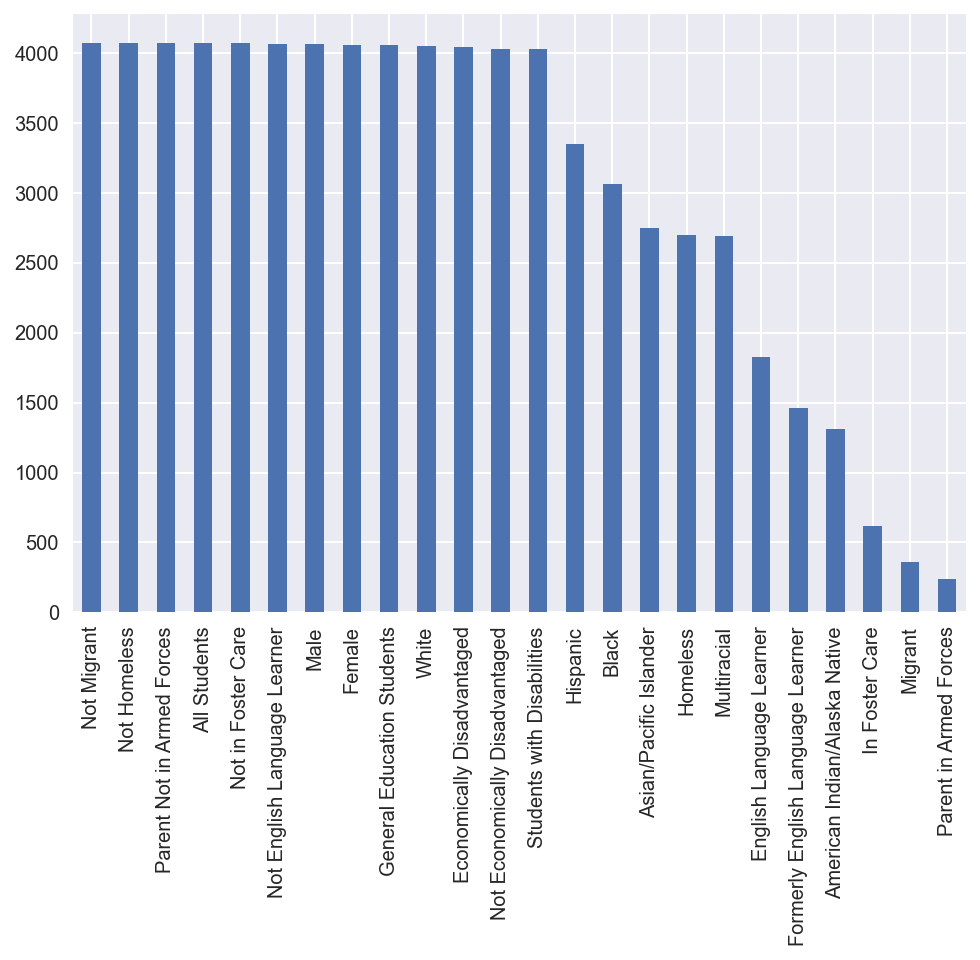

In [10]:
# draw bar chart
df['subgroup_name'].value_counts().plot.bar()

### Summary

Although there are many missing values, it might be normal. For example, at ALBANY CITY SCHOOL DISTRICT, it might not have Male or Female students, etc. These missing values can not impute data. 

### During the next steps, I will choose Male and Female data set for my study.

# 3. Exploratory Data Analysis

Now, We will perform exploratory data analysis to understand the nature of each of the variable

First, to create male and female data sets.

In [11]:
students_df = df[(df['subgroup_name'] == 'Male') | (df['subgroup_name'] == 'Female')  ]

In [12]:
students_df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,8128.0,8128.000000,8128.000000,8128.000000,8128.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000
mean,3.0,4.614665,35.905020,0.047244,2.500492,153.315617,129.932746,88.291436,9.611965,6.260453,68.329345,43.789798,51.991436,38.270655,1.546851,1.266499,8.443955,3.764484,1.056045,0.529219,12.249874,6.093073
std,0.0,1.145346,20.804263,0.212174,0.500031,309.489195,249.606757,11.164616,22.869299,5.931840,155.895410,15.842118,89.316889,19.930416,5.077403,2.191318,30.764922,7.601798,3.729621,1.792281,37.646465,6.167052
min,3.0,1.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,16.000000,0.000000,2.000000,33.000000,29.000000,84.000000,1.000000,3.000000,14.000000,34.000000,9.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.0,5.000000,40.000000,0.000000,3.000000,65.000000,58.000000,91.000000,3.000000,5.000000,26.000000,43.000000,22.000000,38.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,5.000000
75%,3.0,5.000000,57.000000,0.000000,3.000000,150.000000,138.000000,95.000000,8.000000,9.000000,57.000000,52.000000,63.000000,52.000000,2.000000,2.000000,4.000000,5.000000,0.000000,0.000000,7.000000,9.000000
max,3.0,6.000000,68.000000,1.000000,3.000000,4959.000000,4293.000000,100.000000,280.000000,100.000000,2718.000000,100.000000,1295.000000,95.000000,221.000000,25.000000,758.000000,100.000000,52.000000,67.000000,621.000000,56.000000


In [13]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 1 to 73138
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          8128 non-null   object 
 1   aggregation_index           8128 non-null   int64  
 2   aggregation_type            8128 non-null   object 
 3   aggregation_name            8128 non-null   object 
 4   nrc_code                    8128 non-null   int64  
 5   nrc_desc                    8128 non-null   object 
 6   county_code                 8128 non-null   int64  
 7   county_name                 8128 non-null   object 
 8   nyc_ind                     8128 non-null   int64  
 9   membership_desc             8128 non-null   object 
 10  subgroup_code               8128 non-null   int64  
 11  subgroup_name               8128 non-null   object 
 12  enroll_cnt                  7940 non-null   Int64  
 13  grad_cnt                    7940

The count columns and percentage columns have missing value. They should be processed during Data Preparation.

In [14]:
# response column
response_col = ['dropout_cnt']

# categorical columnes
cat_cols = ['report_school_year',  'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name']

# all count columns
cnt_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 
       'still_enr_cnt', 'ged_cnt',  'dropout_cnt']

# all percentage columns
pct_cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct', 'dropout_pct']

To see the number of types of each category

In [15]:
from IPython.display import HTML, display
def display_html_ratio_table(data, cols):
    
    df_shape = data.shape
    
    for i in range(len(cols)):
        
        html = "<table>"
        html += "<tr><td>name</td><td>count</td><td>ratio</td></tr>"
        
        g = data.iloc[:,i].value_counts()

        print(cols[i])
        
        for index, value in g.items():
            html += "<tr><td>%s</td><td>%d</td><td>%.4f</td></tr>" %(index, value, value / df_shape[0])

        html += "</table>"
        display(HTML(html))

display_html_ratio_table(students_df[cat_cols + cnt_cols], cat_cols + cnt_cols)

report_school_year


name,count,ratio
2018-19,8128,1.0000


aggregation_type


name,count,ratio
District,8128,1.0000


aggregation_name


name,count,ratio
NEW YORK CITY GEOGRAPHIC DISTRICT #20,12,0.0015
RHINEBECK CENTRAL SCHOOL DISTRICT,12,0.0015
DOLGEVILLE CENTRAL SCHOOL DISTRICT,12,0.0015
SCHENEVUS CENTRAL SCHOOL DISTRICT,12,0.0015
FILLMORE CENTRAL SCHOOL DISTRICT,12,0.0015
NEW HARTFORD CENTRAL SCHOOL DISTRICT,12,0.0015
INDIAN RIVER CENTRAL SCHOOL DISTRICT,12,0.0015
ARDSLEY UNION FREE SCHOOL DISTRICT,12,0.0015
GORHAM-MIDDLESEX CENTRAL SCHOOL DISTRICT (MARCUS WHITMAN),12,0.0015
WEST ISLIP UNION FREE SCHOOL DISTRICT,12,0.0015


nrc_code


name,count,ratio
5,3952,0.4862
4,1824,0.2244
6,1404,0.1727
3,516,0.0635
1,384,0.0472
2,48,0.0059


nrc_desc


name,count,ratio
Average Needs,3952,0.4862
Rural High Needs,1824,0.2244
Low Needs,1404,0.1727
Urban-Suburban High Needs,516,0.0635
NYC,384,0.0472
Buffalo Rochester Yonkers Syracuse,48,0.0059


county_code


name,count,ratio
58,670,0.0824
28,528,0.0650
66,524,0.0645
14,336,0.0413
26,216,0.0266
51,204,0.0251
42,204,0.0251
6,204,0.0251
44,192,0.0236
41,180,0.0221


county_name


name,count,ratio
SUFFOLK,670,0.0824
NASSAU,528,0.0650
WESTCHESTER,524,0.0645
ERIE,336,0.0413
MONROE,216,0.0266
CHAUTAUQUA,204,0.0251
ONONDAGA,204,0.0251
SAINT LAWRENCE,204,0.0251
ORANGE,192,0.0236
ONEIDA,180,0.0221


nyc_ind


name,count,ratio
0,7744,0.9528
1,384,0.0472


membership_desc


name,count,ratio
2015 Total Cohort - 4 Year Outcome - August 2019,1357,0.1670
2015 Total Cohort - 4 Year Outcome,1357,0.1670
2014 Total Cohort - 5 Year Outcome,1356,0.1668
2014 Total Cohort - 5 Year Outcome - August 2019,1356,0.1668
2013 Total Cohort - 6 Year Outcome - August 2019,1351,0.1662
2013 Total Cohort - 6 Year Outcome,1351,0.1662


subgroup_code


name,count,ratio
3,4068,0.5005
2,4060,0.4995


subgroup_name


name,count,ratio
Male,4068,0.5005
Female,4060,0.4995


enroll_cnt


name,count,ratio
15,102,0.0125
31,100,0.0123
39,96,0.0118
30,92,0.0113
33,90,0.0111
17,90,0.0111
22,88,0.0108
28,88,0.0108
26,84,0.0103
25,82,0.0101


grad_cnt


name,count,ratio
30,107,0.0132
20,105,0.0129
14,103,0.0127
10,99,0.0122
36,97,0.0119
35,94,0.0116
21,94,0.0116
29,90,0.0111
32,90,0.0111
23,89,0.0109


local_cnt


name,count,ratio
1,1175,0.1446
0,1033,0.1271
2,924,0.1137
3,896,0.1102
4,671,0.0826
5,483,0.0594
6,395,0.0486
7,340,0.0418
8,272,0.0335
9,191,0.0235


reg_cnt


name,count,ratio
11,223,0.0274
12,215,0.0265
9,209,0.0257
8,191,0.0235
15,189,0.0233
17,187,0.0230
14,186,0.0229
10,181,0.0223
16,176,0.0217
7,174,0.0214


reg_adv_cnt


name,count,ratio
0,250,0.0308
7,240,0.0295
9,232,0.0285
3,224,0.0276
12,221,0.0272
4,218,0.0268
5,210,0.0258
6,198,0.0244
11,197,0.0242
10,192,0.0236


non_diploma_credential_cnt


name,count,ratio
0,4092,0.5034
1,1847,0.2272
2,854,0.1051
3,386,0.0475
4,199,0.0245
5,131,0.0161
6,77,0.0095
7,51,0.0063
9,45,0.0055
8,34,0.0042


still_enr_cnt


name,count,ratio
0,2711,0.3335
1,1537,0.1891
2,925,0.1138
3,576,0.0709
4,350,0.0431
5,259,0.0319
6,192,0.0236
7,123,0.0151
8,113,0.0139
11,86,0.0106


ged_cnt


name,count,ratio
0,6022,0.7409
1,770,0.0947
2,376,0.0463
3,174,0.0214
4,124,0.0153
5,80,0.0098
7,60,0.0074
6,50,0.0062
9,34,0.0042
8,30,0.0037


dropout_cnt


name,count,ratio
0,1524,0.1875
1,1349,0.1660
2,1009,0.1241
3,740,0.0910
4,551,0.0678
5,407,0.0501
6,277,0.0341
7,257,0.0316
8,196,0.0241
9,143,0.0176


The report_school_year and aggregation_type has one value. They can be dropped.

The nrc_code is alias of nrc_desc. One of them can be dropped.

The county_code is alias of county_name. One of them can be dropped.

The subgroup_code is alias of subgroup_name. One of them can be dropped.

Next, create a new category columns. Then, use bar chart to see them.

In [16]:
# new cagetory columns
# new_cat_cols = ['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind', 'membership_desc',  'subgroup_name']

new_cat_cols = ['aggregation_name', 'nrc_code', 'county_code', 'nyc_ind', 'membership_desc',  'subgroup_code']

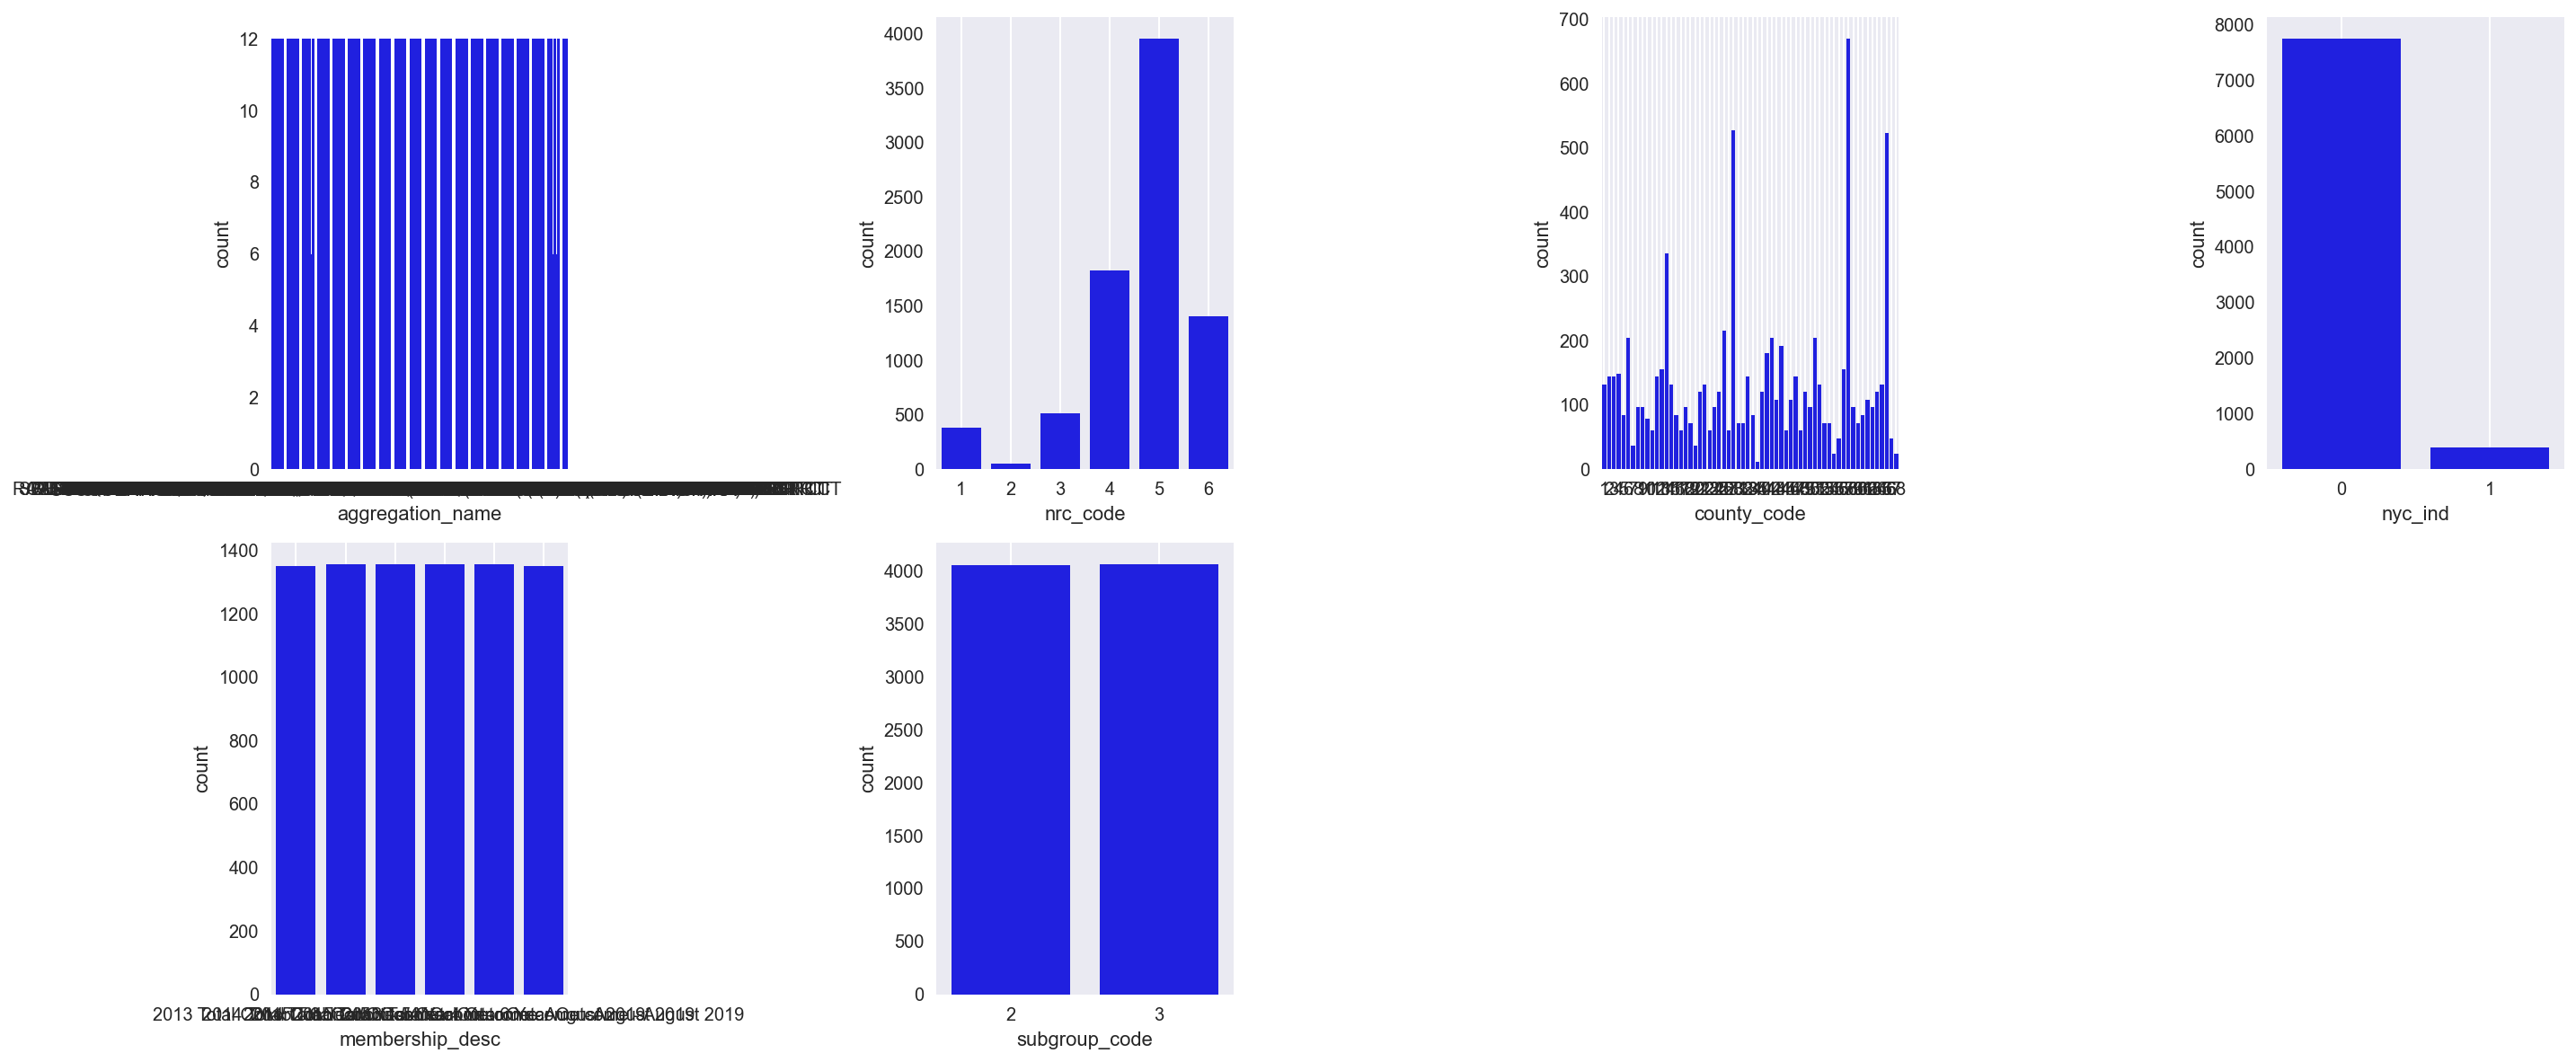

In [17]:
# use bar chart to analyze categories
# see the bar chart
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(new_cat_cols)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=students_df, color='blue')
    plt.grid()
    plt.tight_layout()

The aggregation_name and county_name have many values. They are not fit to be a category.

In [18]:
# drop aggregation_name and county_name. then create a new cagetory columns
new_cat_cols = ['nrc_desc', 'nyc_ind', 'membership_desc',  'subgroup_name']

Next, see the count varibales

Because the count columns have NA value, I will create a new data set to draw bar plots.

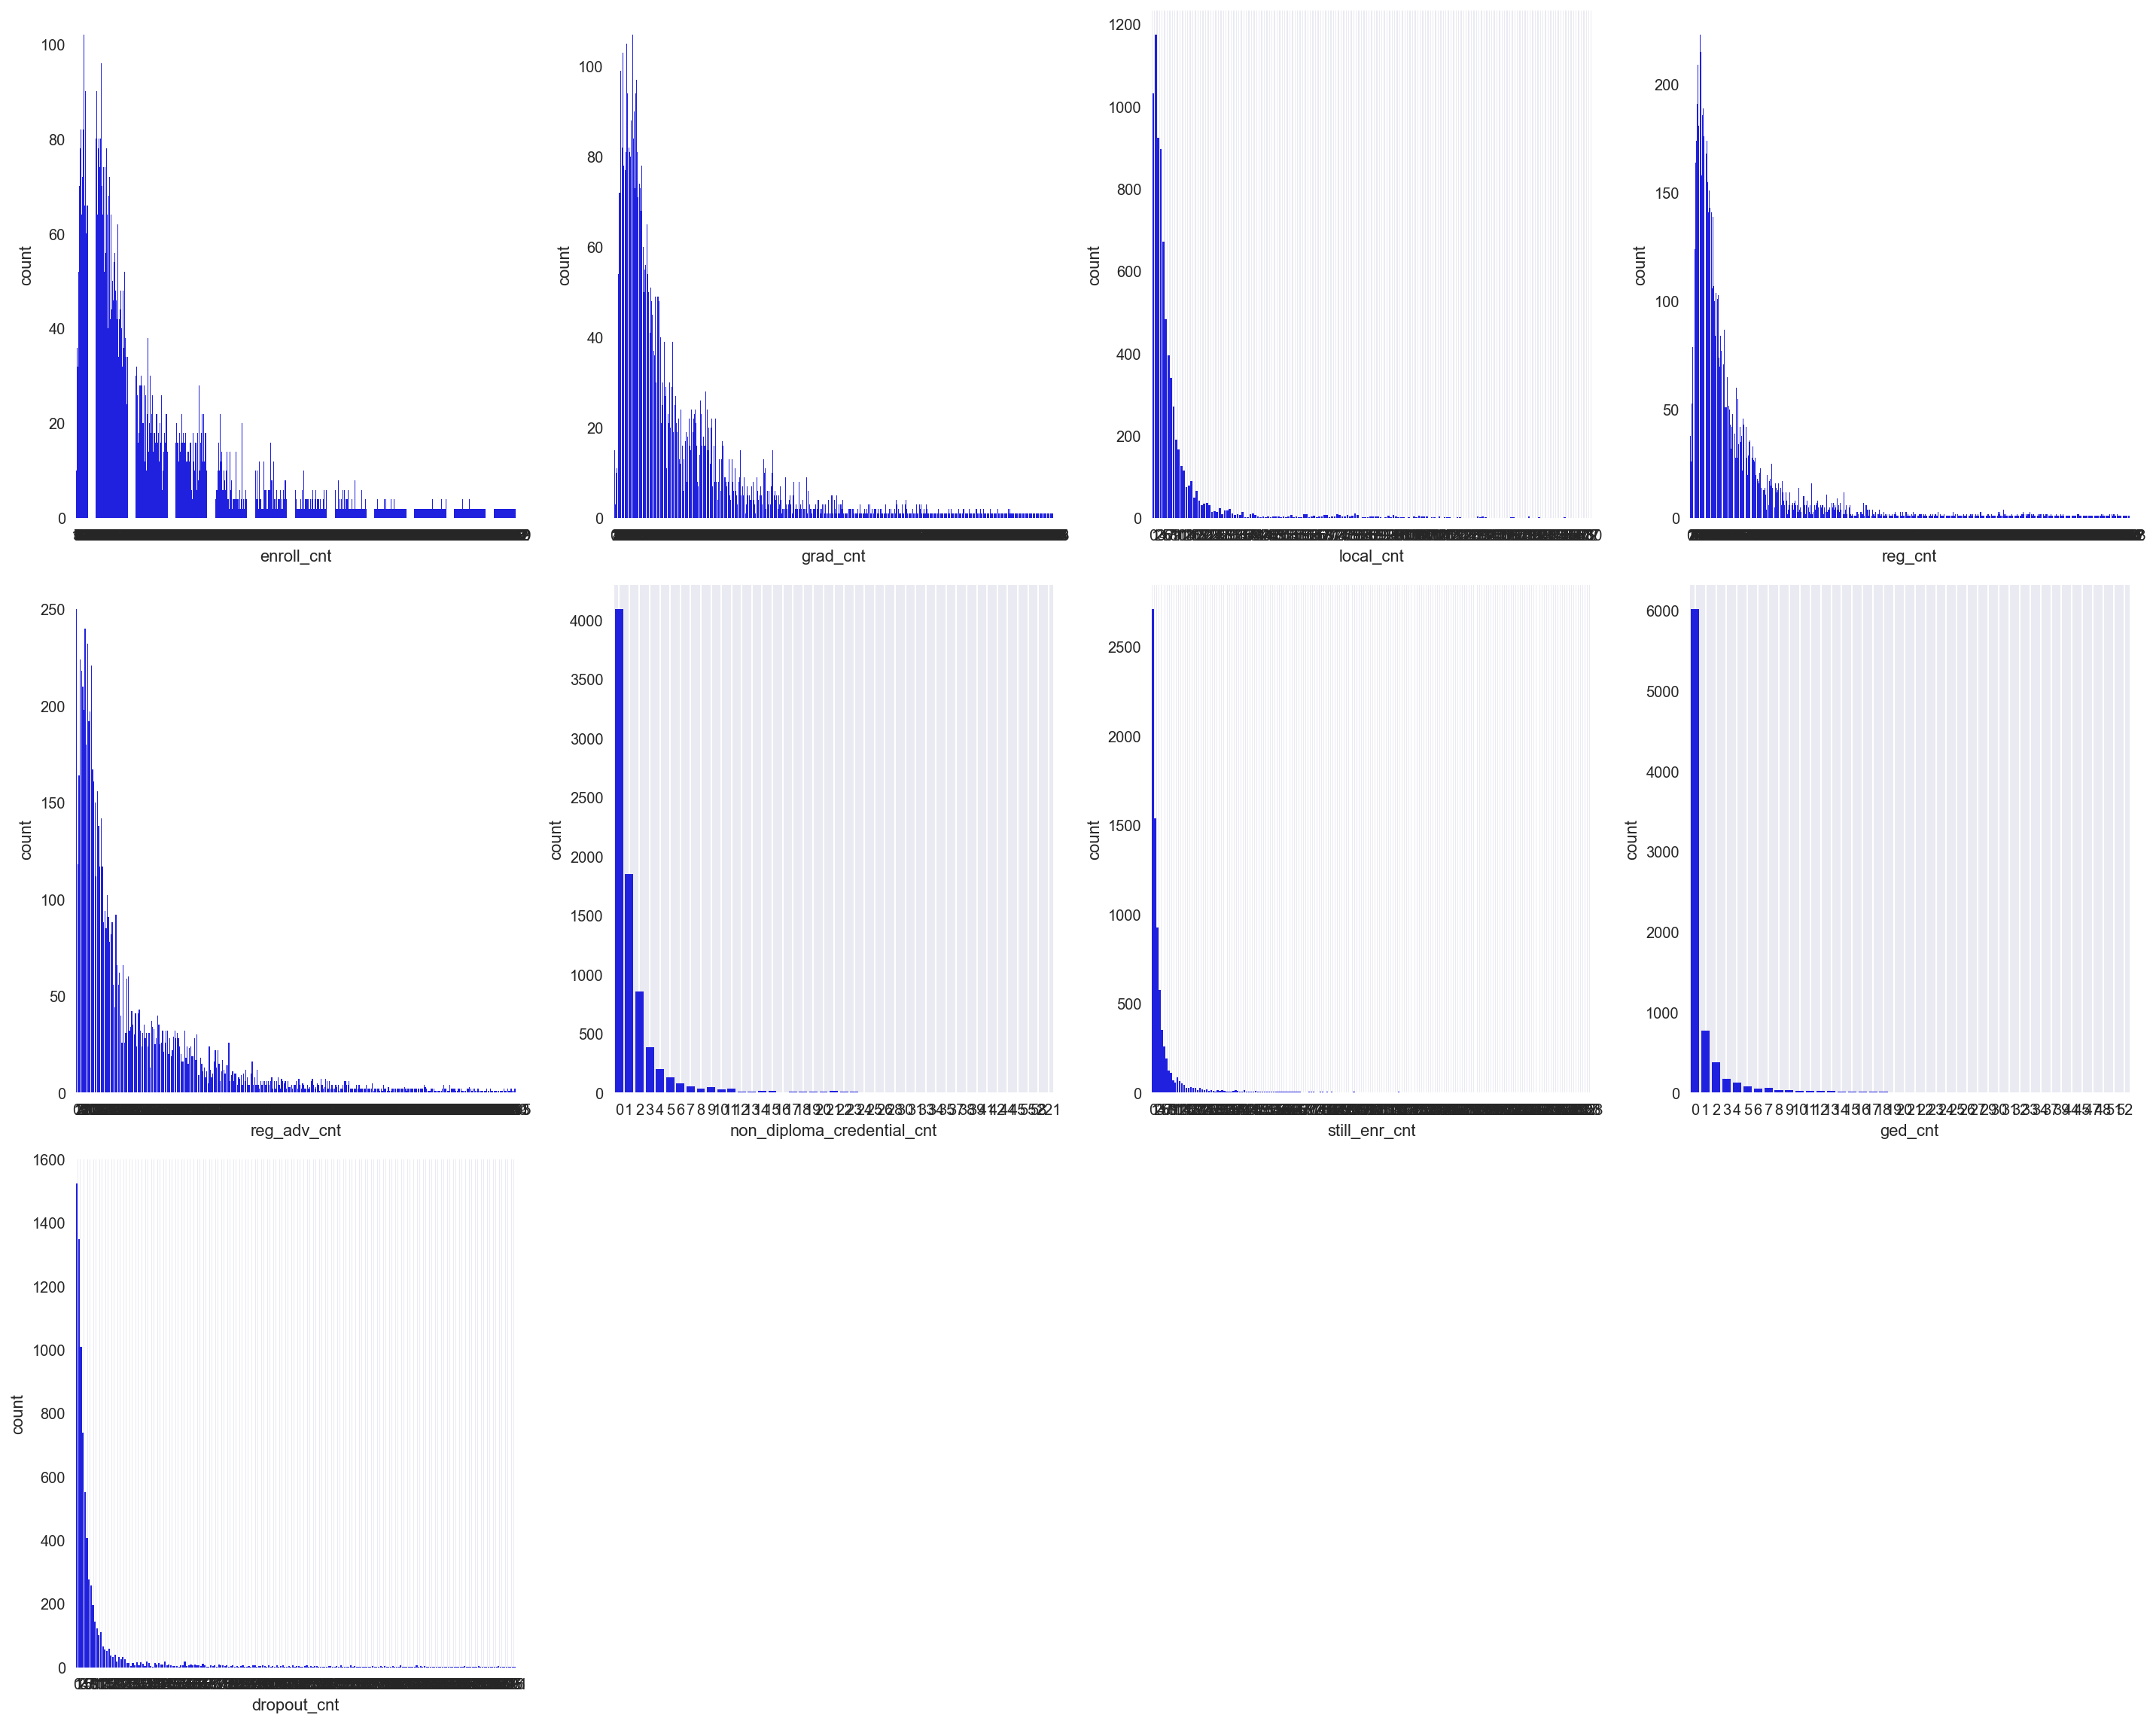

In [19]:
# create a new data set without NA value for all count columns

# see the count columns by bar chart
no_NA_df = students_df[cnt_cols].dropna()

plt.figure(figsize = (20, 16))
for i, col in enumerate(list(cnt_cols)):
    plt.subplot(3, 4, i + 1)
    sns.countplot(x=col, data=no_NA_df, color='blue')
    plt.grid()
    plt.tight_layout()

The above charts show that the values of all count variables concentrate near 0. After imputing missing values, we need review them.

Next, see the percentage variables

In [20]:
# using histogram and boxplot to see the percentage variables
def hist_box(data_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Histogram of " + col)
    sns.histplot(data_df[col], bins = 50, ax=axes[0])
    
    axes[1].set_title("Boxplot of " + col)
    sns.boxplot(y=data_df[col], orient="v",ax=axes[1])
    
def show_statistic(data_df, col):
    
    count = data_df[col].count()
    mean = data_df[col].mean()
    var = data_df[col].var()
    std = data_df[col].std()
    q1 = data_df[col].quantile(.25)
    q2 = data_df[col].quantile(.50)
    q3 = data_df[col].quantile(.75)
    d_min= data_df[col].min()
    d_max = data_df[col].max()
    sigema = 3.0
    
    del_outliers = data_df[np.abs(data_df[col] - mean ) > (sigema * std )]
    
    
    print("%s : count = %d, mean = %.4f, var = %.4f, std = %.4f, q1(25%%) = %.4f, q3(75%%) = %.4f, min = %.4f, max = %.4f" 
          %(col, count, mean, var, std, q1, q3, d_min, d_max))
    
    if del_outliers.shape[0] > 0:
        out_num = del_outliers.shape[0]
        out_pct = (out_num / data_df[col].shape[0]) * 100
        print("It has %d ourliers that larger than (mean + 3*std), account for %.4f %%" %(out_num, out_pct))

grad_pct : count = 7940, mean = 88.2914, var = 124.6486, std = 11.1646, q1(25%) = 84.0000, q3(75%) = 95.0000, min = 0.0000, max = 100.0000
It has 87 ourliers that larger than (mean + 3*std), account for 1.0704 %


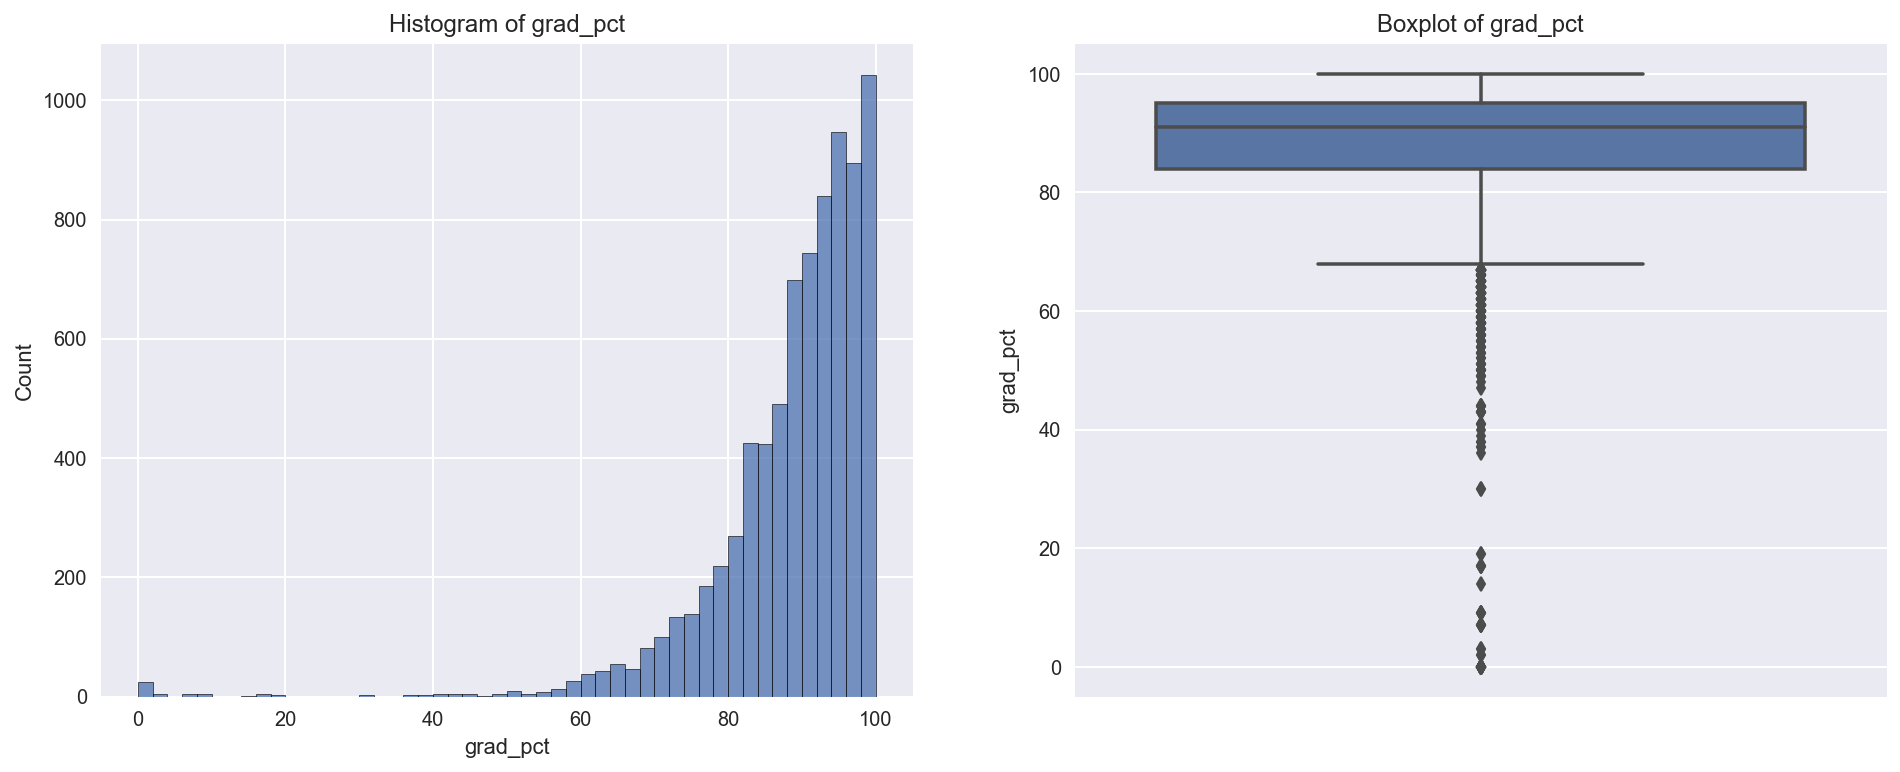

In [21]:
# 14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
hist_box(students_df, 'grad_pct')
show_statistic(students_df, 'grad_pct')

grad_pct shows left skewed distribution and has outliers.

local_pct : count = 7940, mean = 6.2605, var = 35.1867, std = 5.9318, q1(25%) = 3.0000, q3(75%) = 9.0000, min = 0.0000, max = 100.0000
It has 64 ourliers that larger than (mean + 3*std), account for 0.7874 %


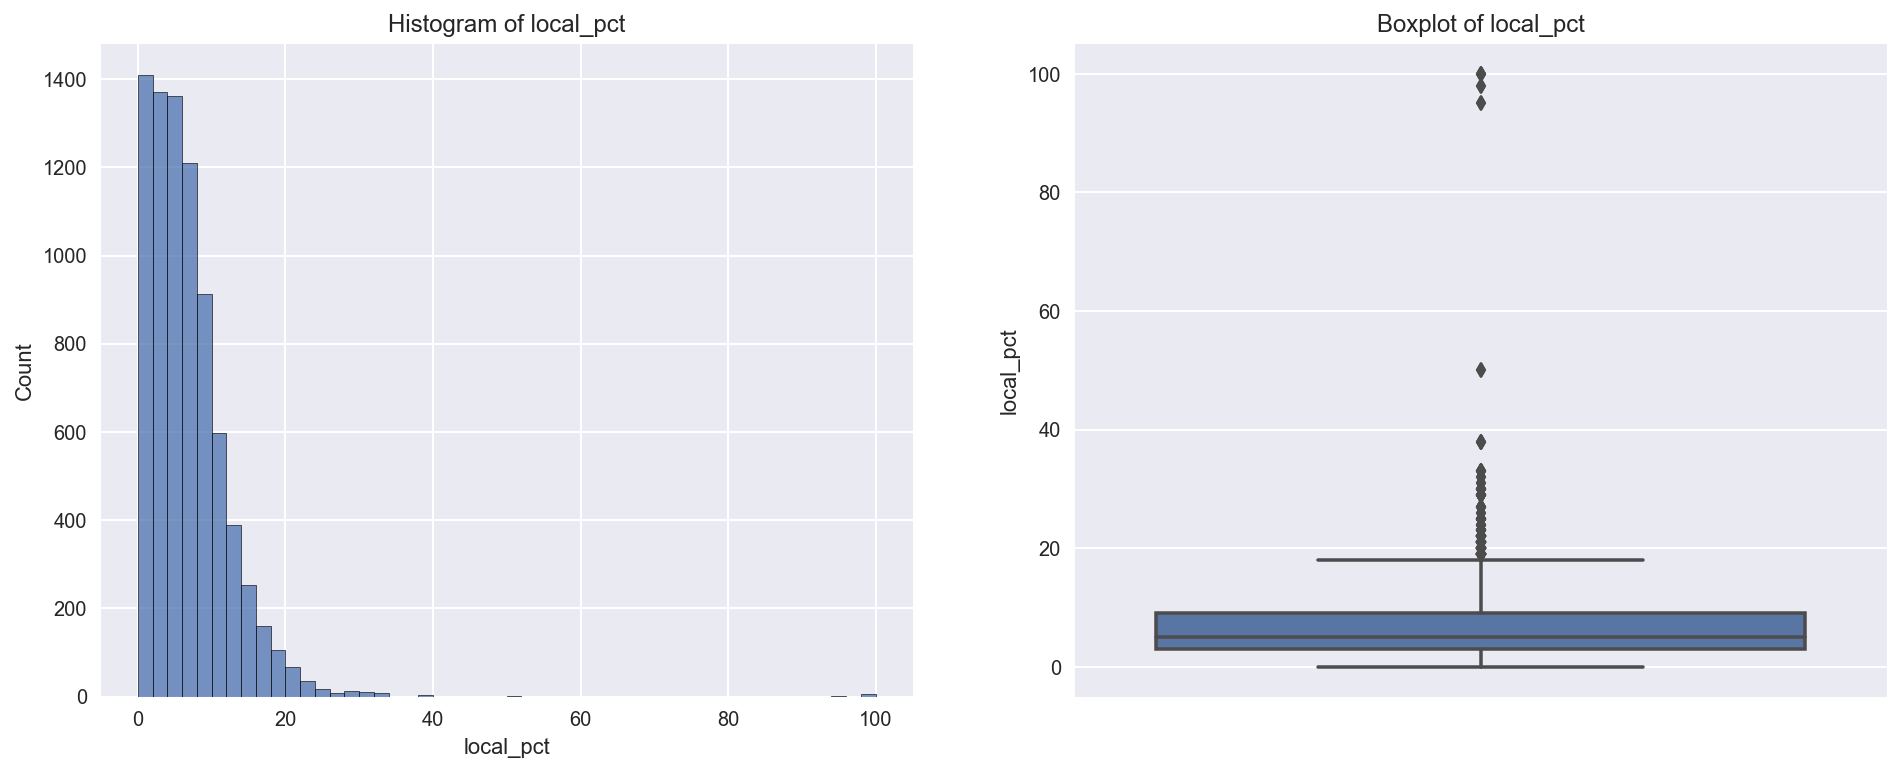

In [22]:
# 16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
hist_box(students_df, 'local_pct')
show_statistic(students_df, 'local_pct')

local_pct shows right skewed distribution and has outliers.

reg_pct : count = 7940, mean = 43.7898, var = 250.9727, std = 15.8421, q1(25%) = 34.0000, q3(75%) = 52.0000, min = 0.0000, max = 100.0000
It has 132 ourliers that larger than (mean + 3*std), account for 1.6240 %


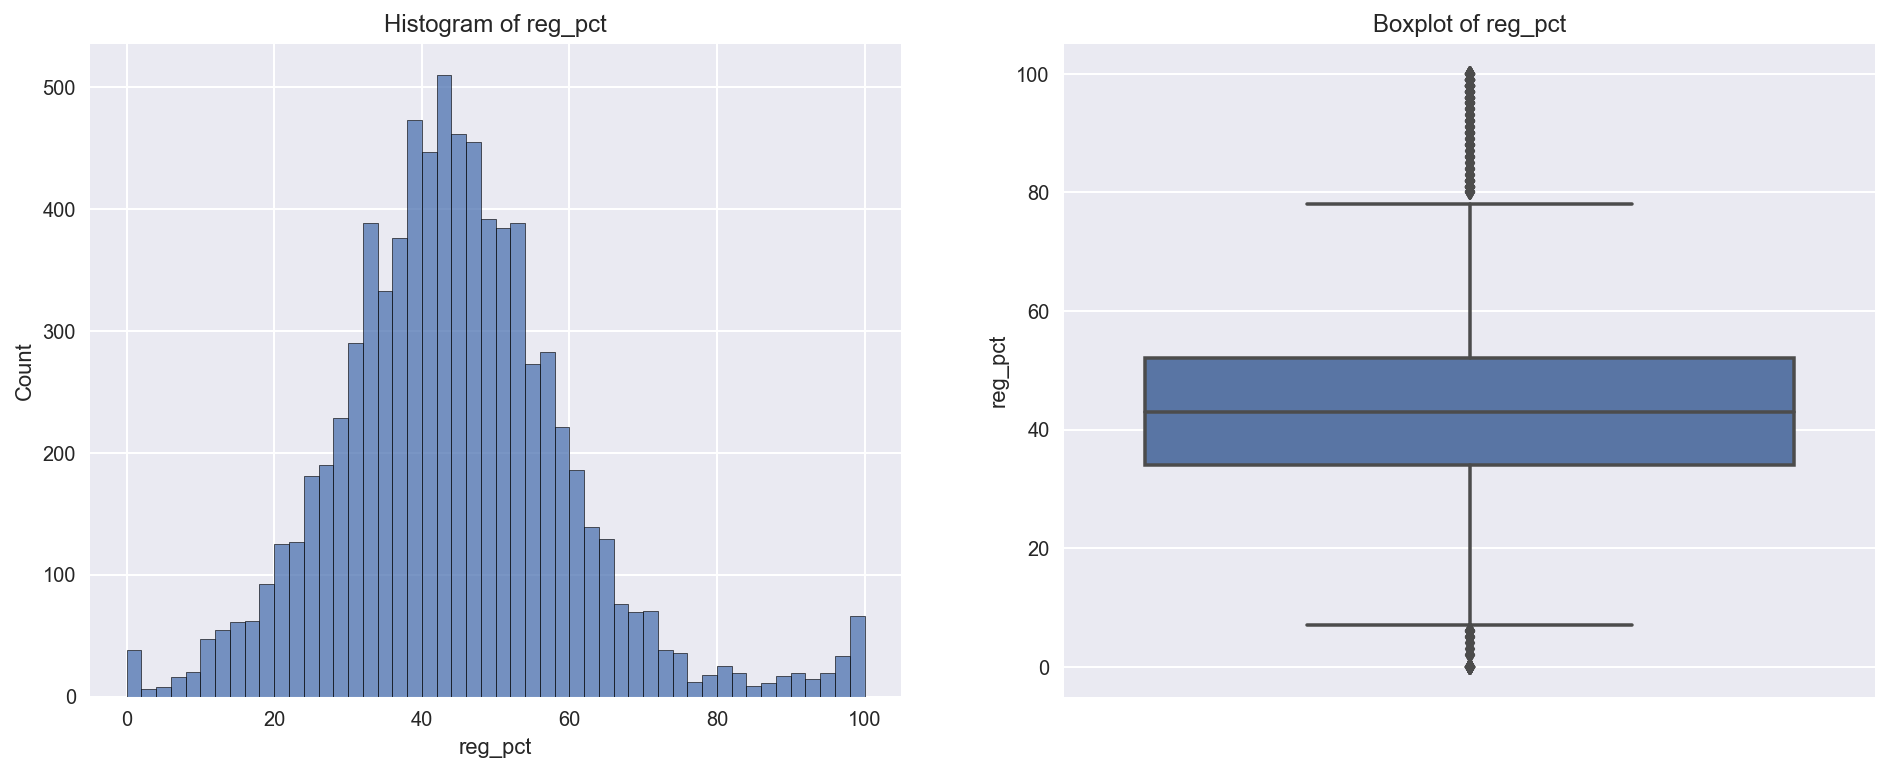

In [23]:
# 18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
hist_box(students_df, 'reg_pct')
show_statistic(students_df, 'reg_pct')

reg_pct shows nearly normal distribution but has outliers on two sides.

reg_adv_pct : count = 7940, mean = 38.2707, var = 397.2215, std = 19.9304, q1(25%) = 24.0000, q3(75%) = 52.0000, min = 0.0000, max = 95.0000


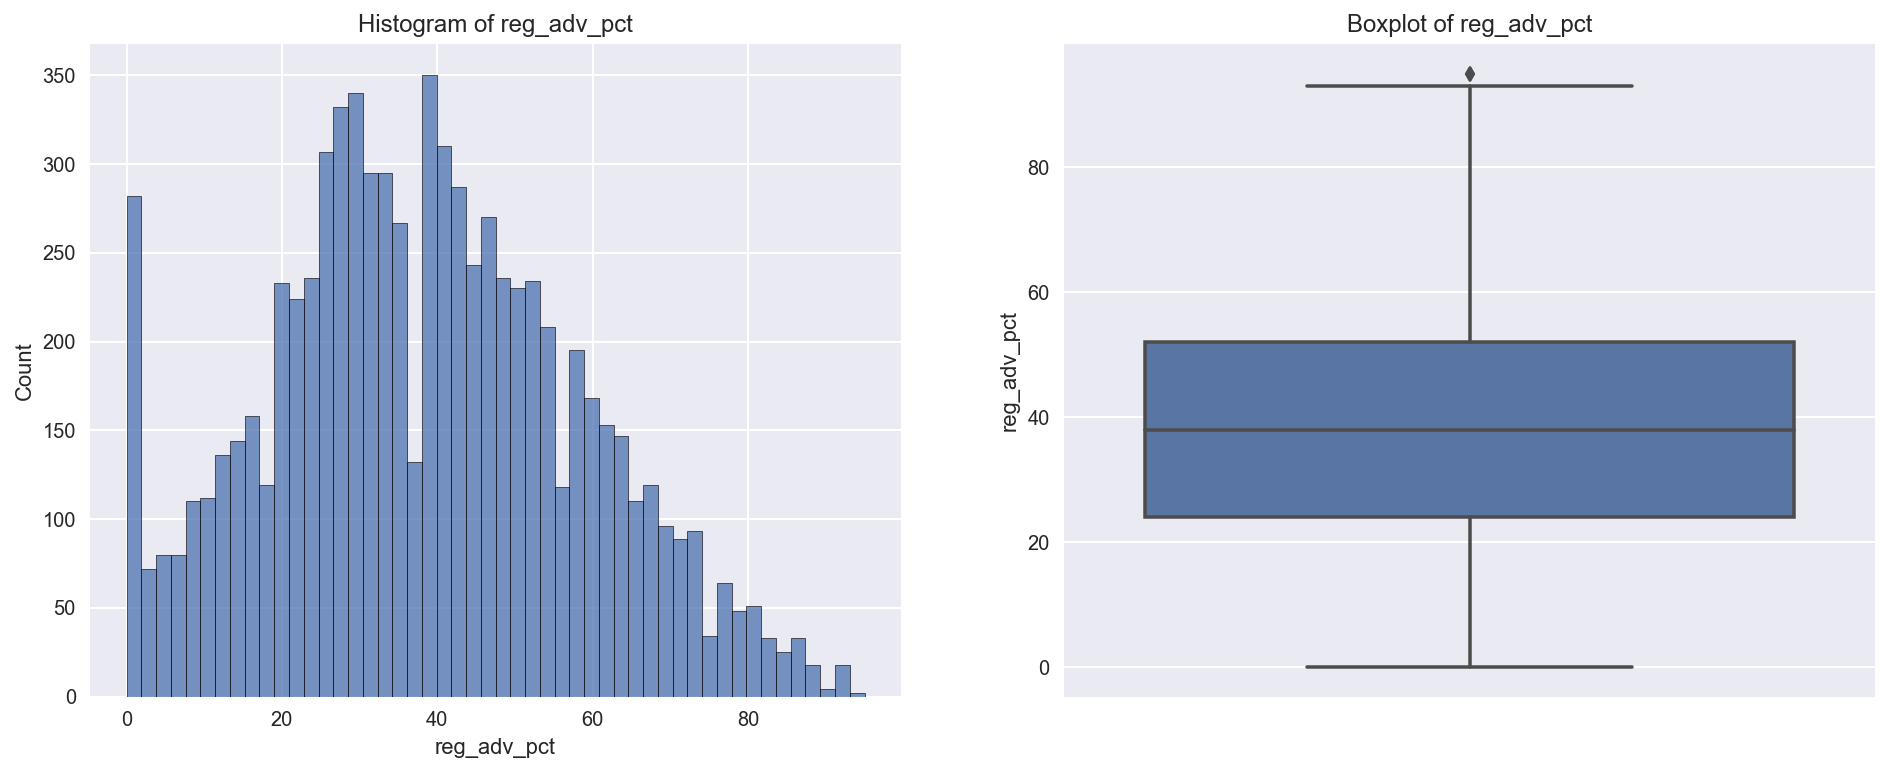

In [24]:
# 20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
hist_box(students_df, 'reg_adv_pct')
show_statistic(students_df, 'reg_adv_pct')

reg_adv_pct shows right skewed distribution. The frequence of 0 is near 5000.

non_diploma_credential_pct : count = 7940, mean = 1.2665, var = 4.8019, std = 2.1913, q1(25%) = 0.0000, q3(75%) = 2.0000, min = 0.0000, max = 25.0000
It has 216 ourliers that larger than (mean + 3*std), account for 2.6575 %


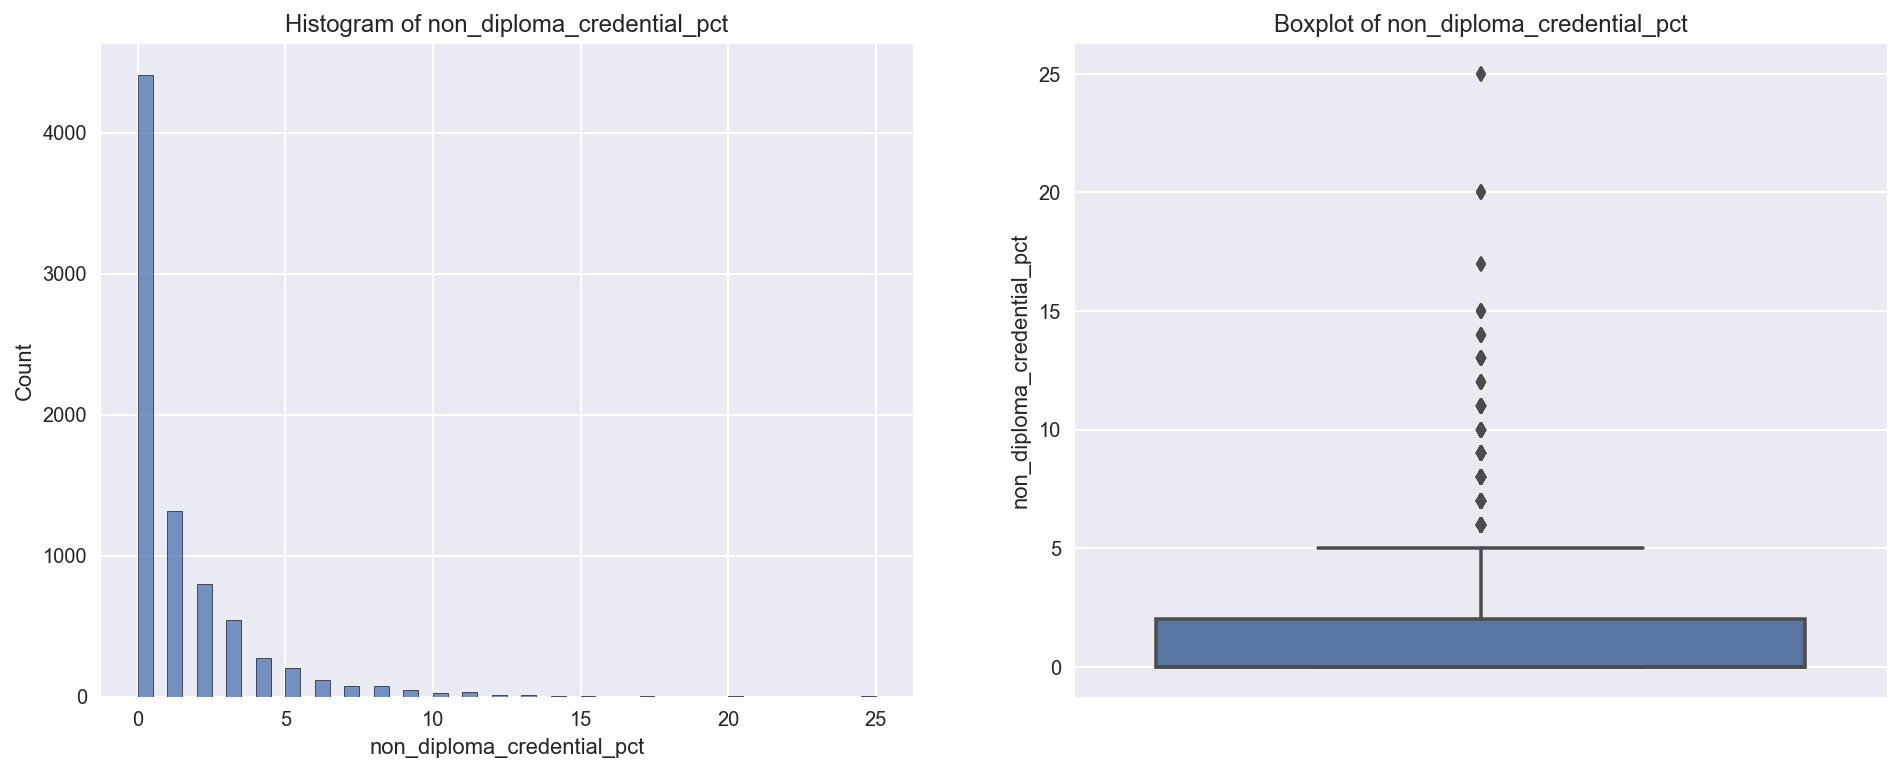

In [25]:
# 22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved 
# a non-diploma credential
hist_box(students_df, 'non_diploma_credential_pct')
show_statistic(students_df, 'non_diploma_credential_pct')

non_diploma_credential_pct shows right skewed distribution and has outliers.

still_enr_pct : count = 7940, mean = 3.7645, var = 57.7873, std = 7.6018, q1(25%) = 0.0000, q3(75%) = 5.0000, min = 0.0000, max = 100.0000
It has 83 ourliers that larger than (mean + 3*std), account for 1.0212 %


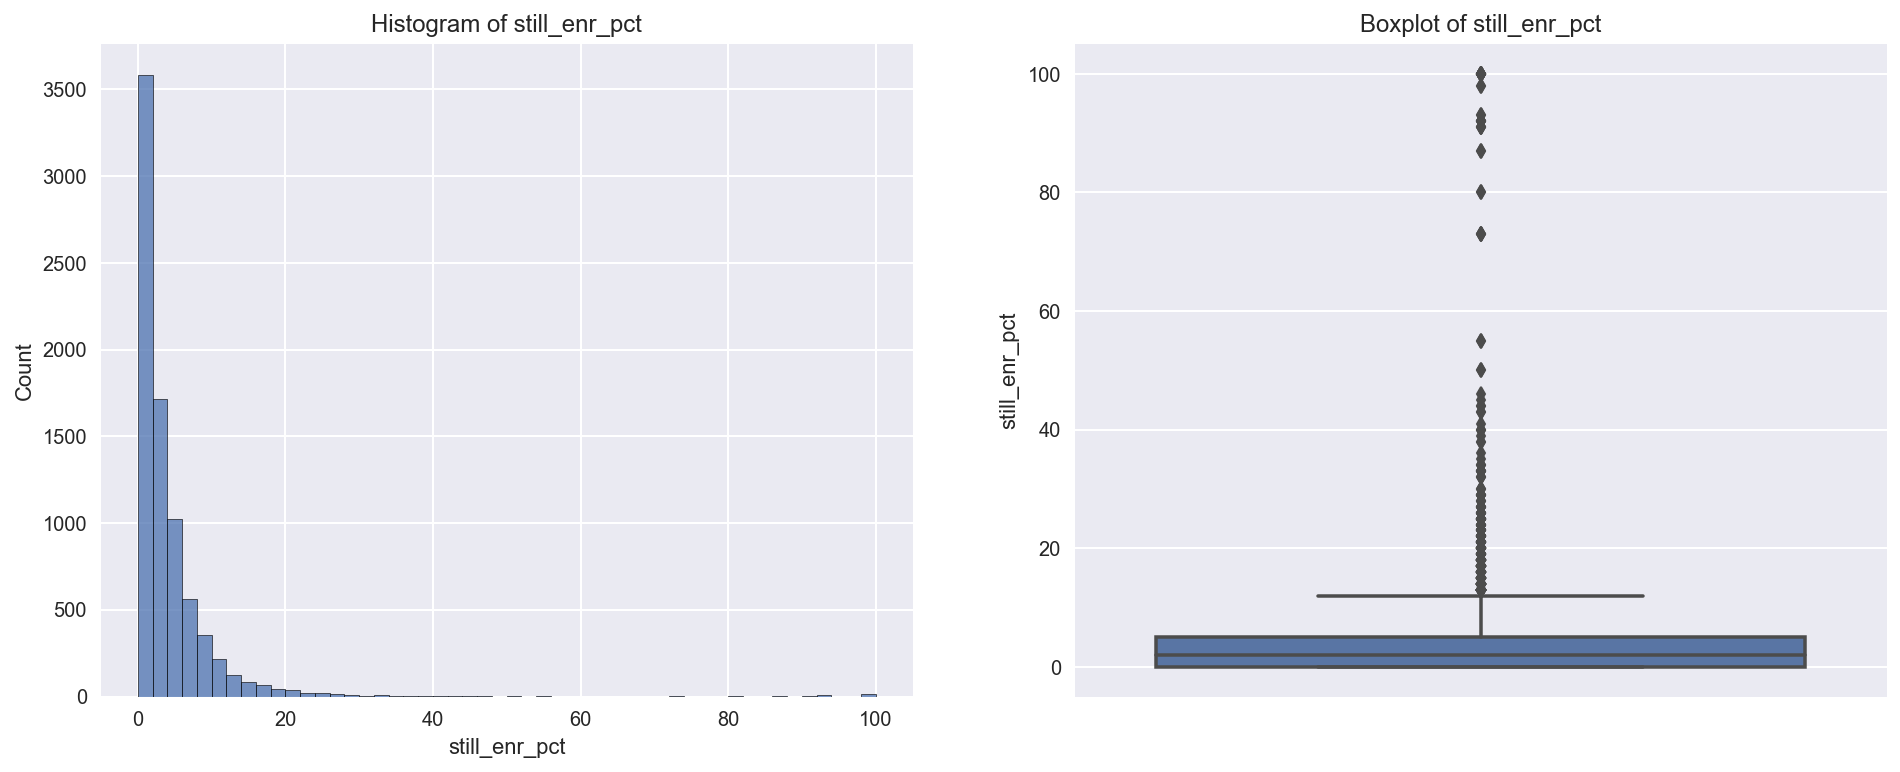

In [26]:
# 24. still_enr_pct: What percentage of enrolled students of the indicated subgrouping did not 
# graduate but were still_enrolled
hist_box(students_df, 'still_enr_pct')
show_statistic(students_df, 'still_enr_pct')

still_enr_pct shows right skewed distribution and has outliers.

dropout_pct : count = 7940, mean = 6.0931, var = 38.0325, std = 6.1671, q1(25%) = 1.0000, q3(75%) = 9.0000, min = 0.0000, max = 56.0000
It has 128 ourliers that larger than (mean + 3*std), account for 1.5748 %


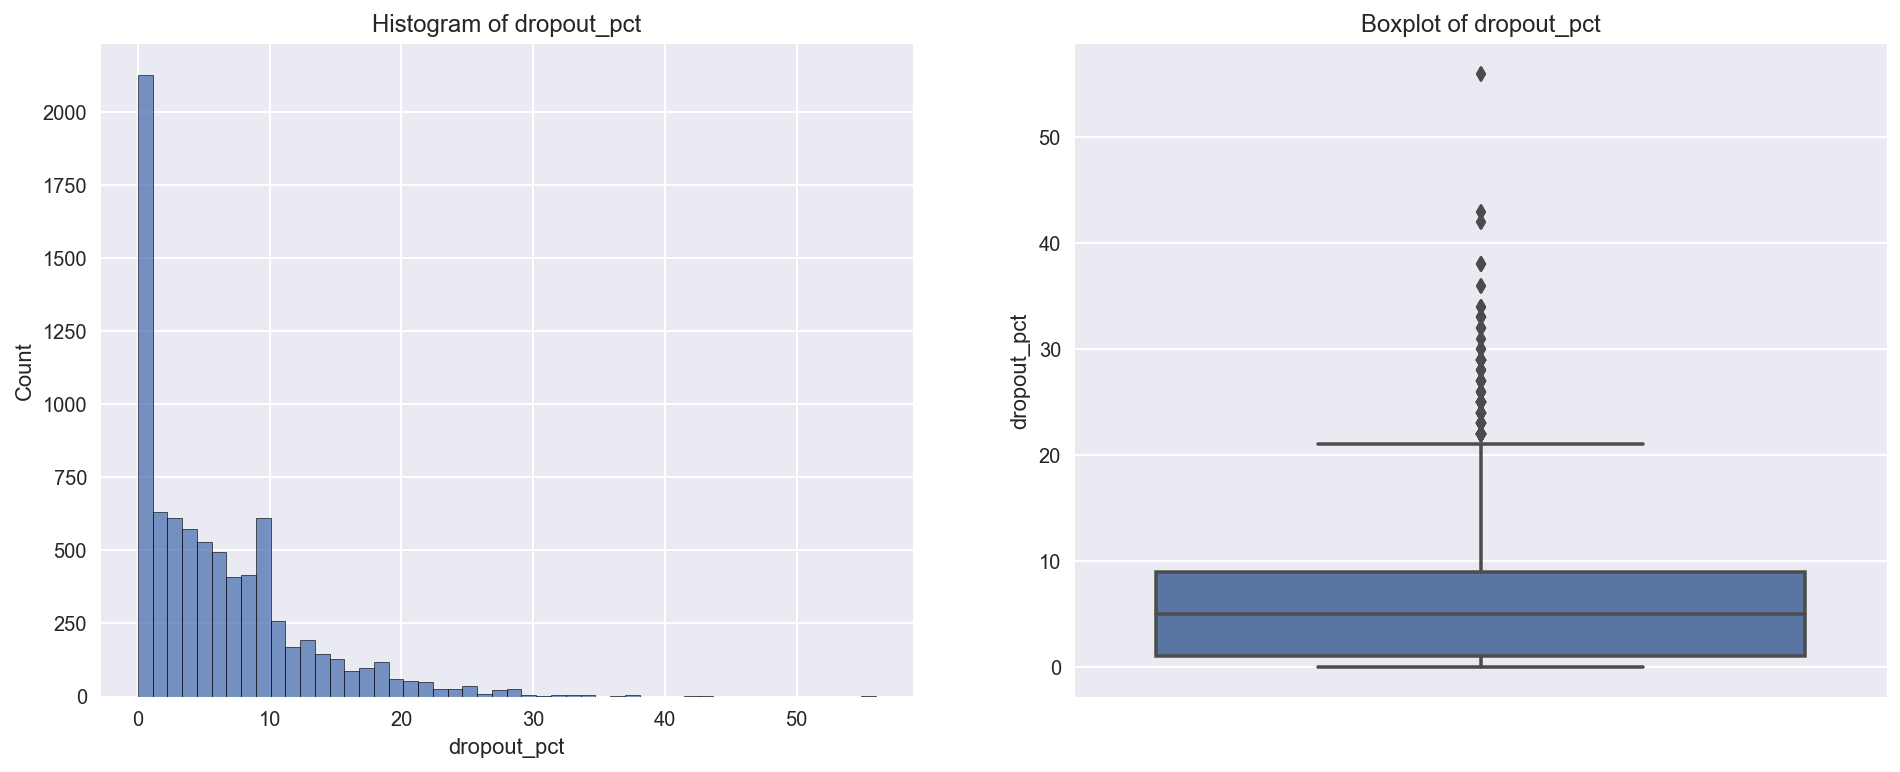

In [27]:
# 28. dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school 
# enrollment during the school year
hist_box(students_df, 'dropout_pct')
show_statistic(students_df, 'dropout_pct')

dropout_pct shows right skewed distribution and has outliers.

ged_pct : count = 7940, mean = 0.5292, var = 3.2123, std = 1.7923, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 67.0000
It has 132 ourliers that larger than (mean + 3*std), account for 1.6240 %


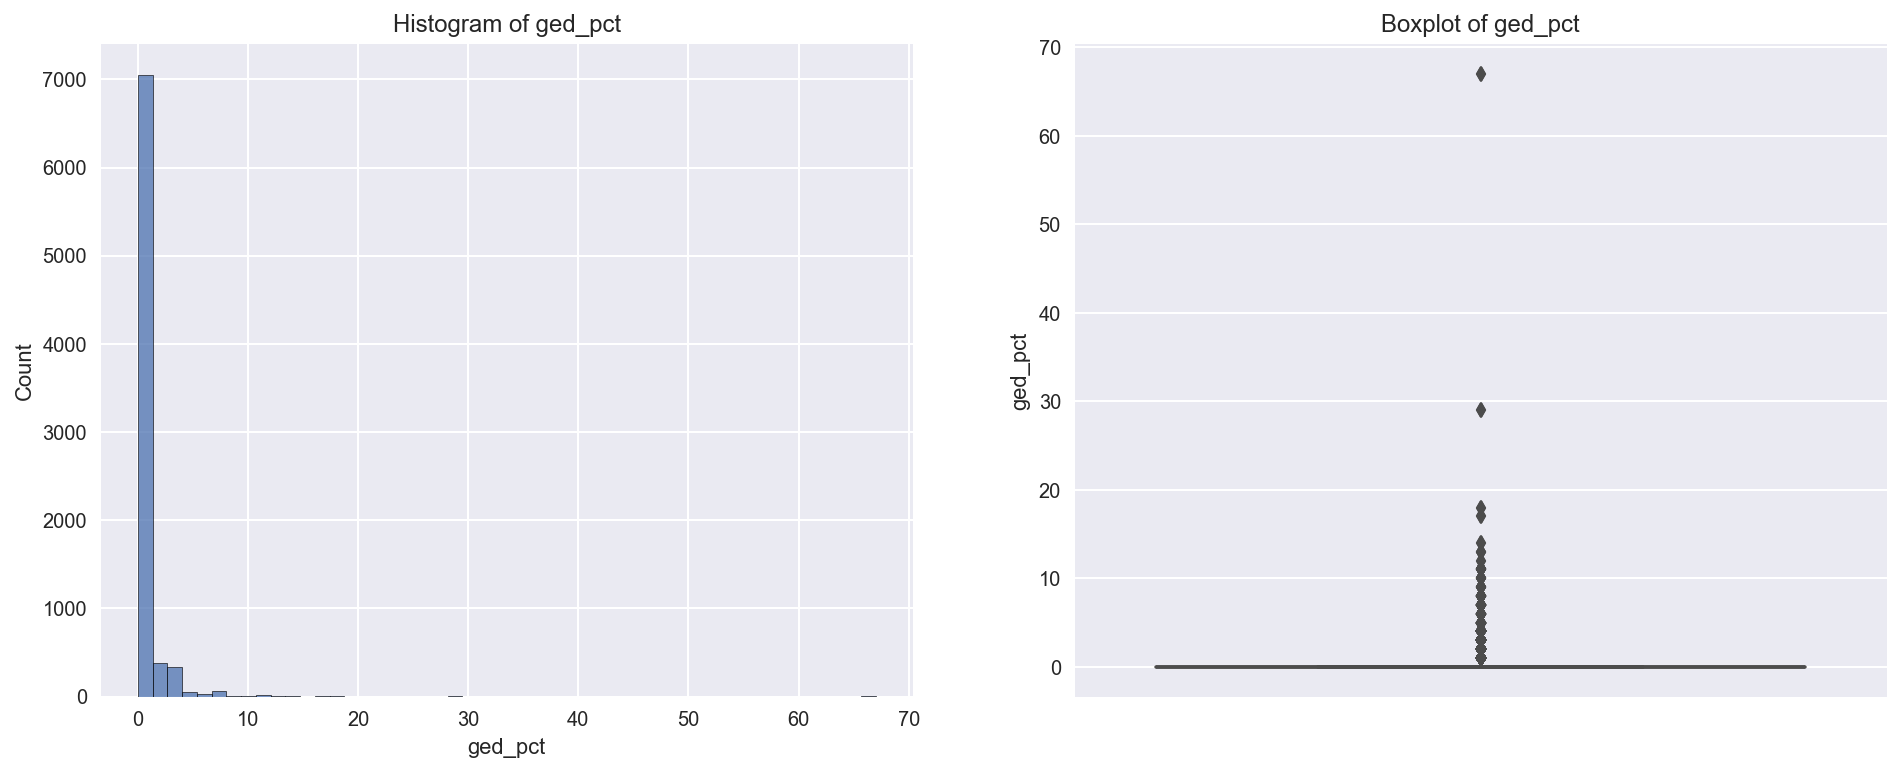

In [28]:
# 26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
hist_box(students_df, 'ged_pct')
show_statistic(students_df, 'ged_pct')

ged_pct concentrates from 0 to 4. It has outliers.

See the correlation values

In [29]:
corr_matrix = students_df[new_cat_cols + cnt_cols + pct_cols].corr()
corr_matrix['dropout_cnt'].sort_values(ascending = False)

dropout_cnt                   1.000000
local_cnt                     0.899954
enroll_cnt                    0.854612
reg_cnt                       0.853142
grad_cnt                      0.800373
ged_cnt                       0.794530
nyc_ind                       0.681699
still_enr_cnt                 0.679062
non_diploma_credential_cnt    0.618180
reg_adv_cnt                   0.517217
dropout_pct                   0.390595
still_enr_pct                 0.136961
local_pct                     0.089355
reg_pct                       0.075397
ged_pct                       0.073577
non_diploma_credential_pct    0.004549
reg_adv_pct                  -0.267807
grad_pct                     -0.322617
Name: dropout_cnt, dtype: float64

### Summary

The original data set contains many subgroupings. These subgroupings are suitable for comparative by groups. I select Male and female as my study data set.

During the Exploratory Data Analysis, I found as followed:

The Male and Female set has missing values.

I select 'nrc_desc', 'nyc_ind', 'membership_desc' and  'subgroup_name' as the categories, because the code of them are not easy to interpret.

The values of all count variables concentrate near 0. After imputing missing values, we need review them.

The distribution of percentage columns show following:

Left skewed distribution: grad_pct

Right skewed distribution: local_pct， reg_adv_pct， non_diploma_credential_pct， still_enr_pct， dropout_pct, ged_pct

Normal distribution: reg_pct


# 4. Data Preparation

- Process Missing values
- Drop outliers

In [30]:
# copy a new data set

students_df = students_df[new_cat_cols + cnt_cols + pct_cols].copy()

In [31]:
students_df.shape

(8128, 21)

### Process Missing values

Find the missing percentage

In [32]:
missing_values_percent = students_df.isnull().mean()*100
missing_values_percent    # missing_values_percent.plot.bar()

nrc_desc                      0.000000
nyc_ind                       0.000000
membership_desc               0.000000
subgroup_name                 0.000000
enroll_cnt                    2.312992
grad_cnt                      2.312992
local_cnt                     2.312992
reg_cnt                       2.312992
reg_adv_cnt                   2.312992
non_diploma_credential_cnt    2.312992
still_enr_cnt                 2.312992
ged_cnt                       2.312992
dropout_cnt                   2.312992
grad_pct                      2.312992
local_pct                     2.312992
reg_pct                       2.312992
reg_adv_pct                   2.312992
non_diploma_credential_pct    2.312992
still_enr_pct                 2.312992
ged_pct                       2.312992
dropout_pct                   2.312992
dtype: float64

<AxesSubplot:>

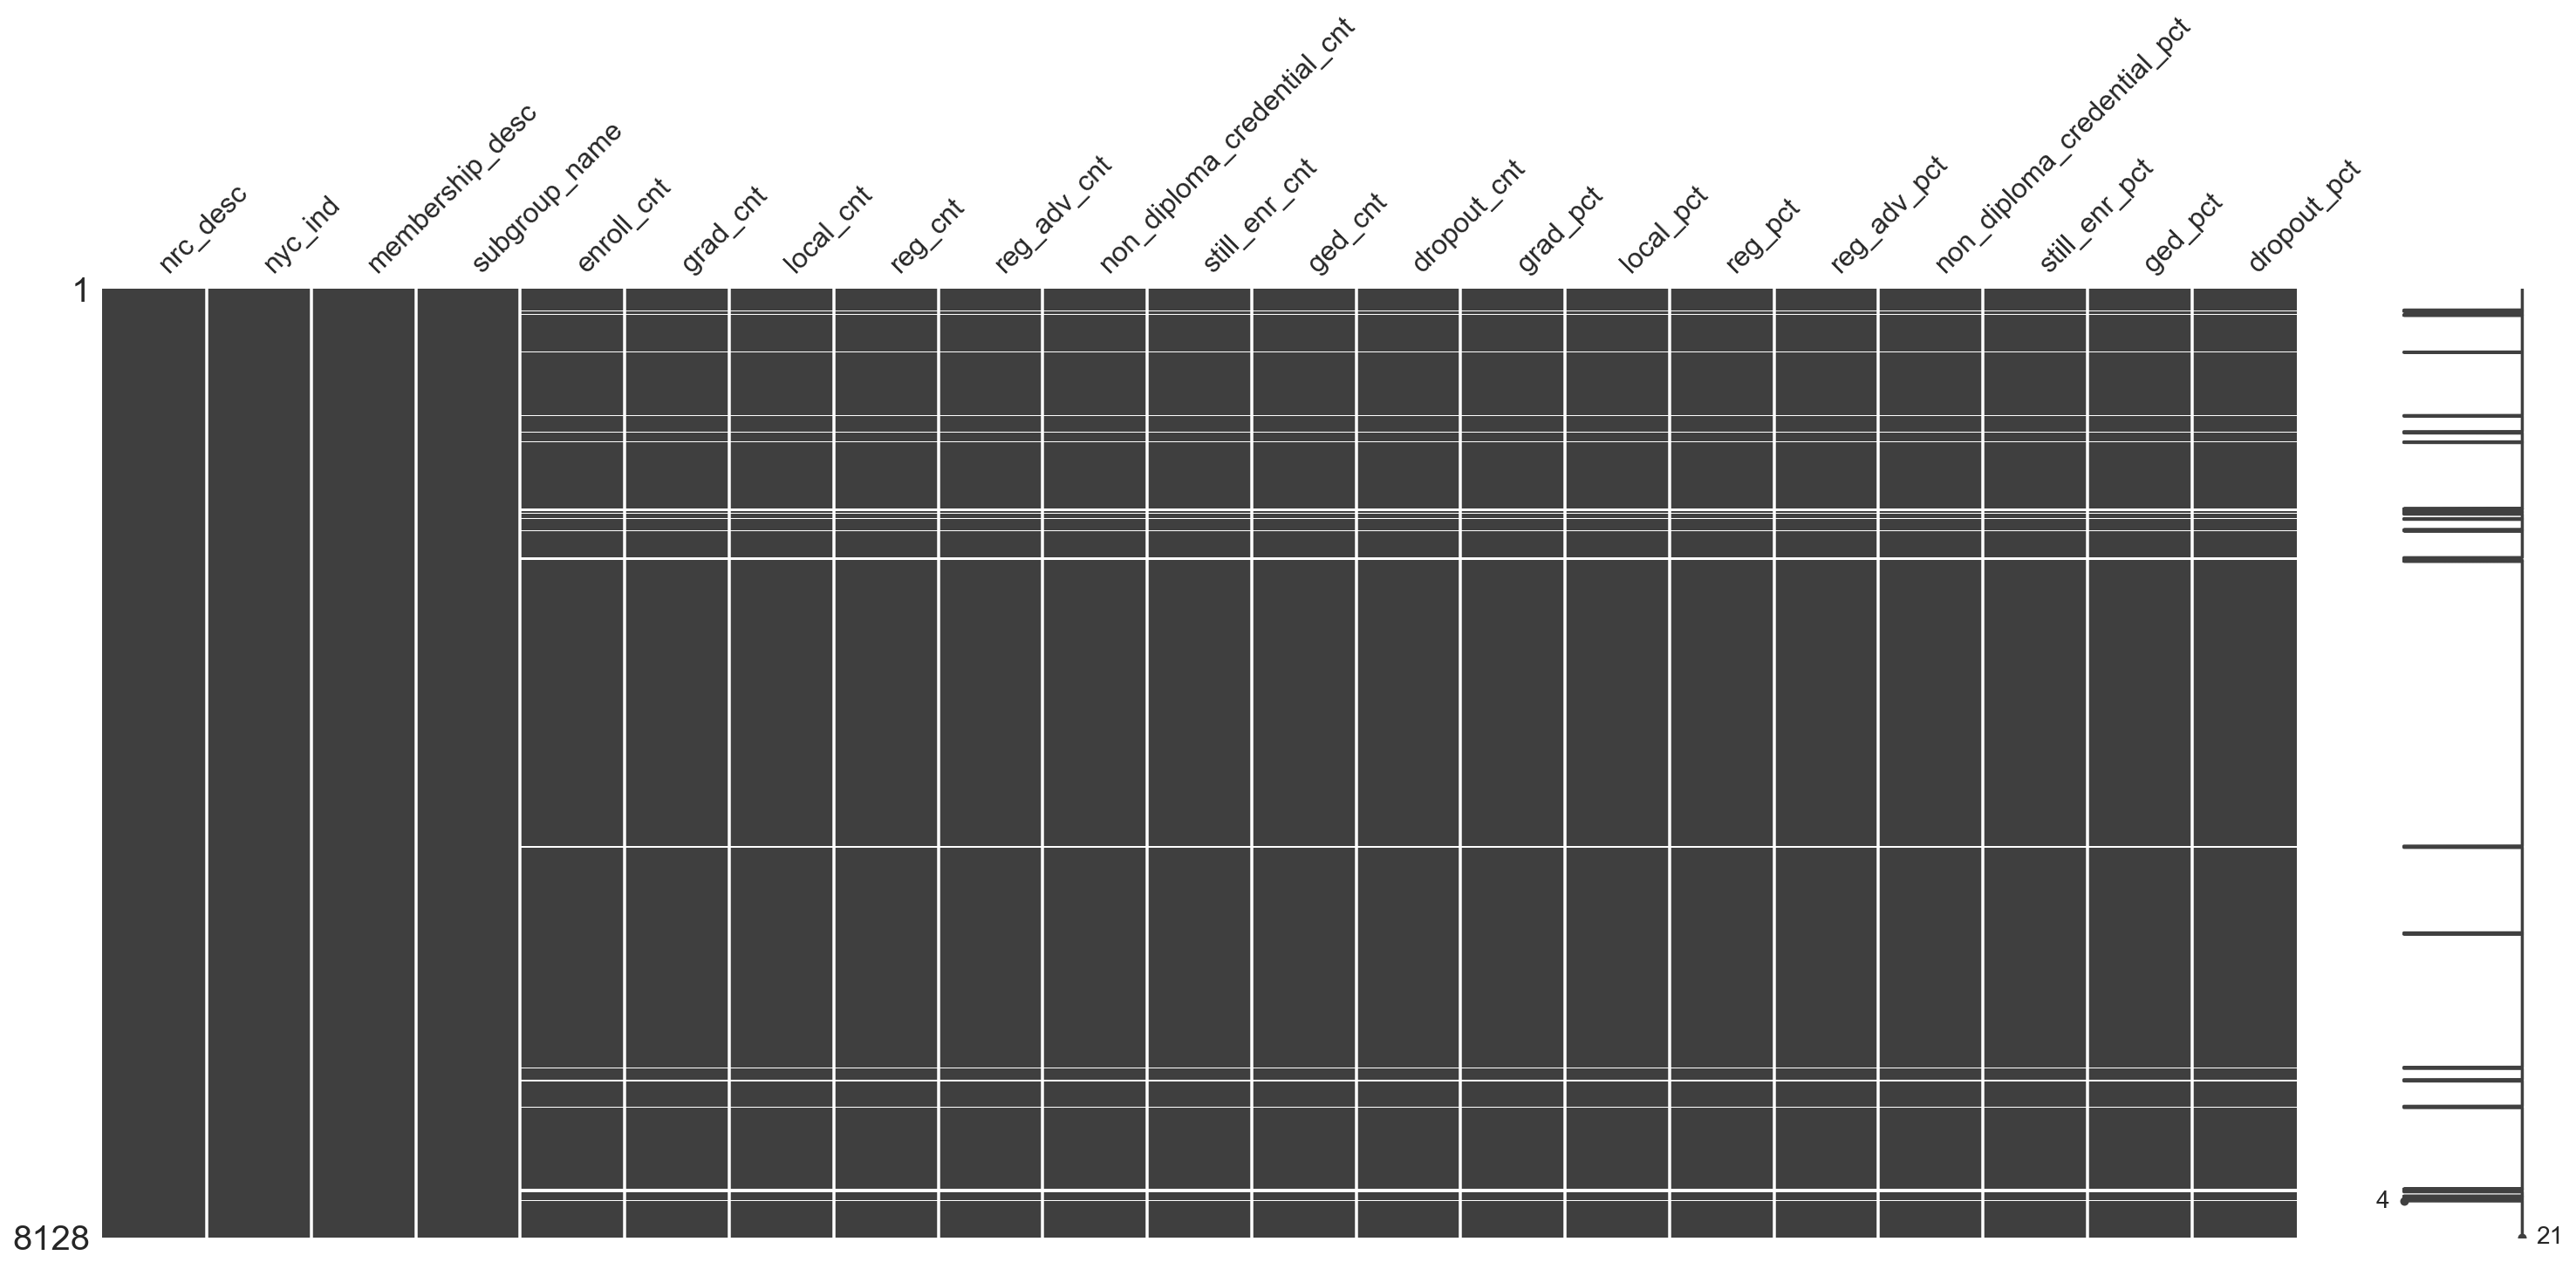

In [33]:
msno.matrix(students_df)

Where data is missing. No clear patterns are showed

### Drop missing values

I want to drop these missing vlaues, because different membership_desc might have no data. For example, at the INDIAN LAKE CENTRAL SCHOOL DISTRICT, the 2013 Total Cohort - 6 Year Outcome might have not data. Addtional, 2014 Total Cohort - 5 Year Outcome and 2015 Total Cohort - 4 Year Outcome of this DISTRICT also have not data. Using 2016 to impute 2014 and 2015 is not sutiable. Thrid, the missing values account for 2.31% of total data. I decided to drop them

In [34]:
# drop nan
prepared_student_df = students_df.dropna()

In [35]:
# check
prepared_student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7940 entries, 1 to 73138
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nrc_desc                    7940 non-null   object 
 1   nyc_ind                     7940 non-null   int64  
 2   membership_desc             7940 non-null   object 
 3   subgroup_name               7940 non-null   object 
 4   enroll_cnt                  7940 non-null   Int64  
 5   grad_cnt                    7940 non-null   Int64  
 6   local_cnt                   7940 non-null   Int64  
 7   reg_cnt                     7940 non-null   Int64  
 8   reg_adv_cnt                 7940 non-null   Int64  
 9   non_diploma_credential_cnt  7940 non-null   Int64  
 10  still_enr_cnt               7940 non-null   Int64  
 11  ged_cnt                     7940 non-null   Int64  
 12  dropout_cnt                 7940 non-null   Int64  
 13  grad_pct                    7940

### Drop outliers

In [36]:
def two_box_compare(ori_df, now_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Original data ")
    sns.boxplot(y=ori_df[col], orient="v",ax=axes[0])
    
    axes[1].set_title("New data ")
    sns.boxplot(y=now_df[col], orient="v",ax=axes[1])

def statistic_compare(data_1, data_2, cols):
    for col in cols:
        mean1 = data_1[col].mean()
        std1 = data_1[col].std()
        
        mean2 = data_2[col].mean()
        std2 = data_2[col].std()
        
        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100
        
        print("%s :\n the mean decreased from %.2f to %.2f , the mean value has decreased by more than %.2f %% .\n the standard deviation decreased from %.2f to %.2f the standard deviation value has decreased by more than %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))

def drop_outliers(data_df, cols, sigema = 3.0):
    del_arr = []
    for col in cols:
        del_outliers = data_df[np.abs(data_df[col] - data_df[col].mean() ) > (sigema * data_df[col].std() )]
        
        #Q1 = data_df[col].quantile(0.25)
        #Q3 = data_df[col].quantile(0.75)
        #IQR = Q3 - Q1

        # Creating notinvalidarea dataframe with boolean values:
        # False means these values are into the valid area 
        # True indicates presence of an outlier
        #notinvalidarea = (onlinenews < (Q1 - 1.5 * IQR)) | (onlinenews > (Q3 + 1.5 * IQR))
        
        #del_outliers = data_df[(data_df[col] < (Q1 - sigema * IQR)) | (data_df[col] > (Q3 + sigema * IQR)) ]

        del_arr.append(del_outliers)
        
        
    del_df = pd.concat(del_arr)
    
    del_df.drop_duplicates(keep='first', inplace=True)
    print("There are %d outliers that account for %.2f %%. They all large than (%.1f * std + mean) of column." 
          %(del_df.shape[0], (del_df.shape[0] / data_df.shape[0]) * 100, sigema))
    
    return del_df


from IPython.display import HTML, display
def display_html_statistic_table(ori, now, title1="1st", title2="2nd",col=""):
    

        
    html = "<table>"
    html += "<tr><td>%s</td><td>%s</td><td>%s</td></tr>" %(col, title1, title2)
    html += "<tr><td>%s</td><td>%d</td><td>%d</td></tr>" %('count', ori[col].shape[0], now[col].shape[0])
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('mean', ori[col].mean(), now[col].mean())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('std', ori[col].std(), now[col].std())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('min', ori[col].min(), now[col].min())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('25%', ori[col].quantile(0.25), now[col].quantile(0.25))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('50%', ori[col].quantile(0.50), now[col].quantile(0.50))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('75%', ori[col].quantile(0.75), now[col].quantile(0.75))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('max', ori[col].max(), now[col].max())

    html += "</table>"
    display(HTML(html))

#### check all outliers of numeric variables

In [37]:
# Getting outliers that larger than (mean + 3 * std).
del_outliers_df = drop_outliers(prepared_student_df, cnt_cols + pct_cols, 3.0)

There are 1055 outliers that account for 13.29 %. They all large than (3.0 * std + mean) of column.


All numerical outliers account for 13.31% of all data. I can not drop them all.

Next, I will drop outliers of response variable.

#### check outliers of response variable

In [38]:
# find outliers of response variable.
del_3_sigema_outliers_df = drop_outliers(prepared_student_df, response_col, 3.0)

There are 187 outliers that account for 2.36 %. They all large than (3.0 * std + mean) of column.


In [39]:
# copy a data set to test
del_test_df_3_sigema = prepared_student_df.copy()

In [40]:
# drop outliers
del_test_df_3_sigema.drop(del_3_sigema_outliers_df.index.values, inplace=True)

In [41]:
del_test_df_3_sigema.shape

(7753, 21)

In [42]:
corr_matrix_3_sigema = del_test_df_3_sigema[cnt_cols + pct_cols].corr()
corr_matrix_3_sigema["dropout_cnt"].sort_values(ascending = False)

dropout_cnt                   1.000000
local_cnt                     0.822759
reg_cnt                       0.788017
enroll_cnt                    0.759615
grad_cnt                      0.692301
still_enr_cnt                 0.664864
non_diploma_credential_cnt    0.664470
ged_cnt                       0.650834
dropout_pct                   0.425349
reg_adv_cnt                   0.368847
still_enr_pct                 0.163901
local_pct                     0.080636
reg_pct                       0.077338
ged_pct                       0.076039
non_diploma_credential_pct    0.000695
reg_adv_pct                  -0.284401
grad_pct                     -0.356056
Name: dropout_cnt, dtype: float64

In [43]:
display_html_statistic_table(prepared_student_df, del_test_df_3_sigema, title1="with outliers",
                             title2 = "droped outliers", col="dropout_cnt")

dropout_cnt,with outliers,droped outliers
count,7940,7753
mean,12.2499,7.3704
std,37.6465,15.7074
min,0.0000,0.0000
25%,1.0000,1.0000
50%,3.0000,2.0000
75%,7.0000,6.0000
max,621.0000,125.0000


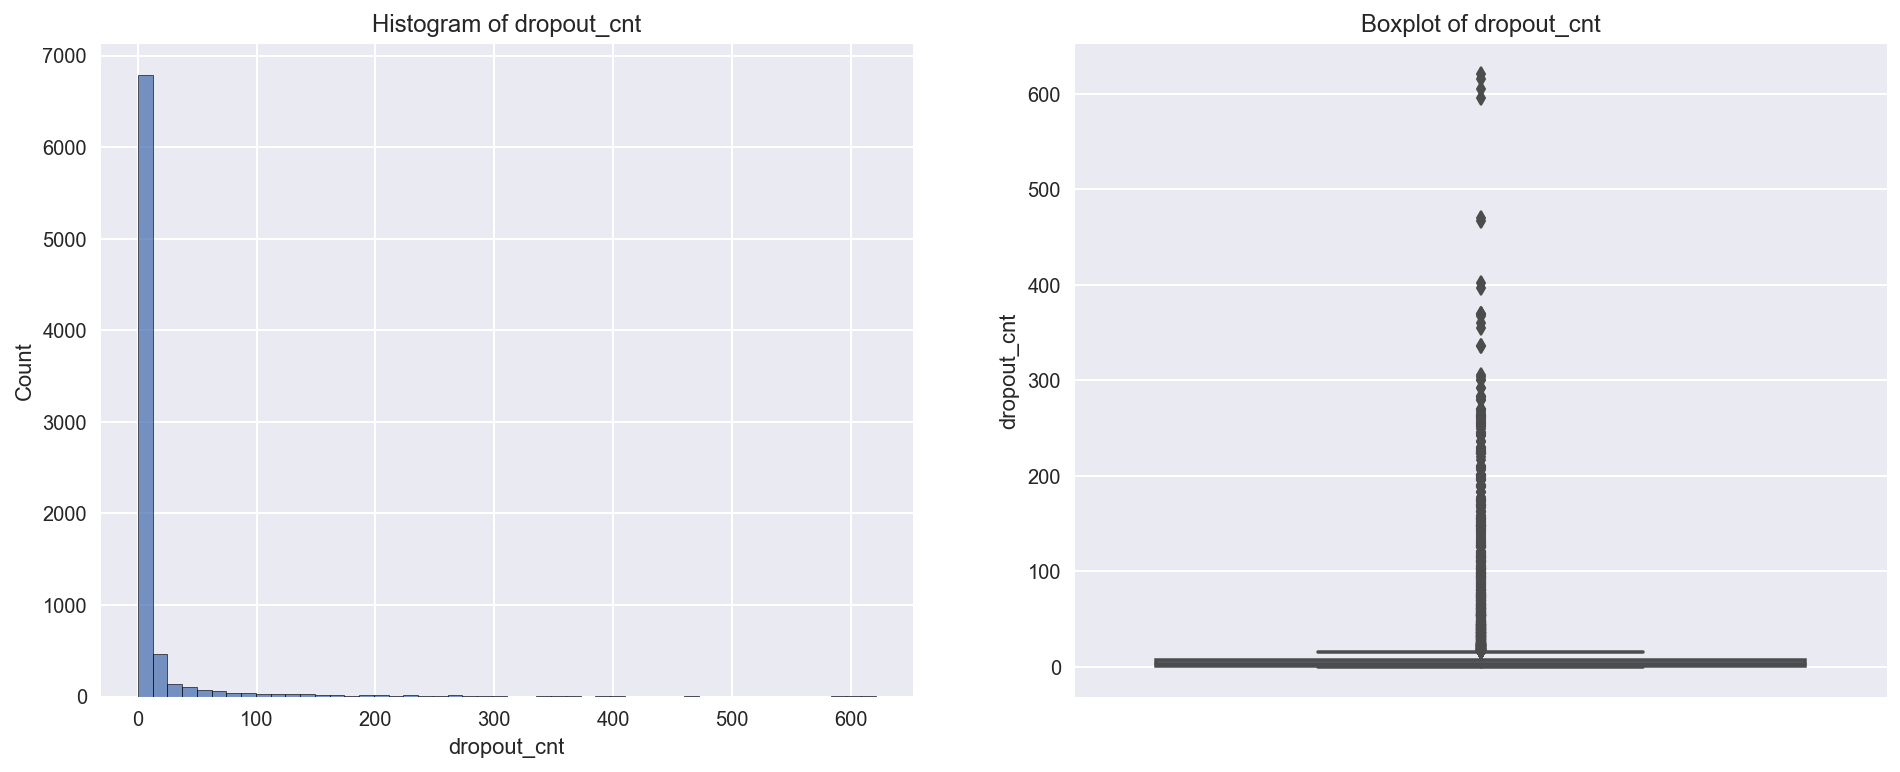

In [44]:
# Original data set with outliers
hist_box(prepared_student_df, 'dropout_cnt')

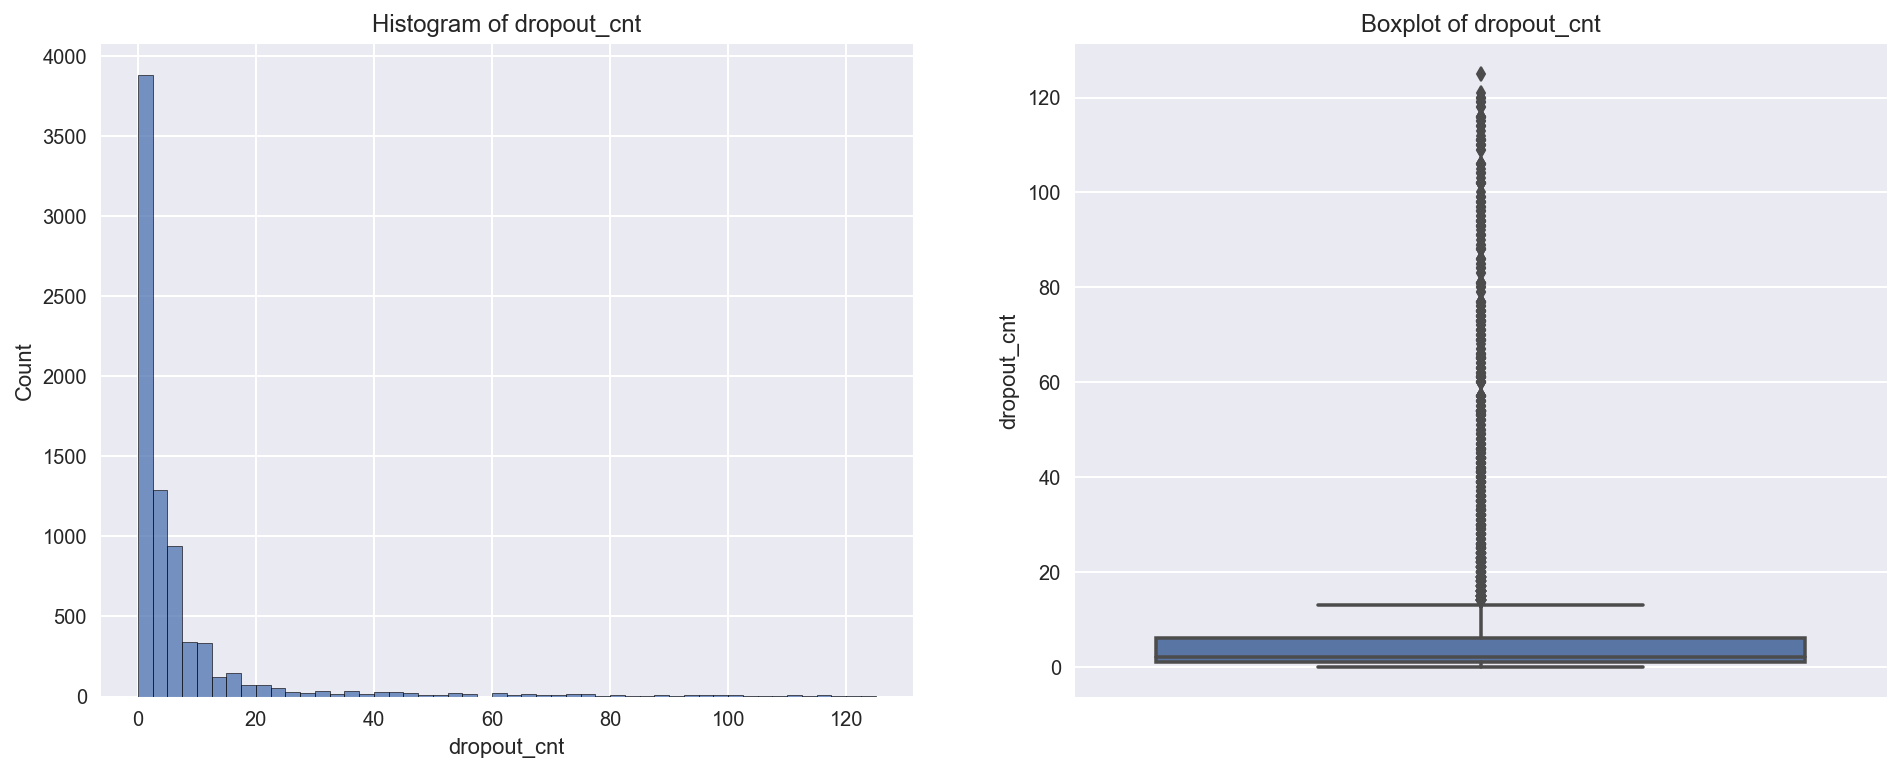

In [45]:
# now data set without outliers
hist_box(del_test_df_3_sigema, "dropout_cnt")

From above description, histogram and bar plot, we can see as followed:

The response variable dropped outliers (187 outliers) has std (15.7074) lower than std (37.6465) of original response variable. It means the shares become more concentrate.

#### I will drop outliers with (mean + 3 * std)

In [46]:
prepared_student_df = del_test_df_3_sigema.copy()
prepared_student_df.shape

(7753, 21)

# 5. Prepped Data Review (Re-run Exploratory Data Analysis)

In [47]:
prepared_student_df.describe()

,nyc_ind,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct
count,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000
mean,0.030569,121.026054,106.013930,6.939120,52.140978,46.933832,1.119825,5.762157,0.684380,7.370437,88.668902,6.196311,43.649684,38.853476,1.265059,3.654714,0.515929,5.843029
std,0.172157,184.575837,157.949634,12.564279,92.232978,71.384955,2.129626,18.553278,2.098905,15.707433,10.936414,5.962075,15.974125,19.755332,2.207978,7.598244,1.808358,5.945486
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,29.000000,1.000000,13.000000,9.000000,0.000000,0.000000,0.000000,1.000000,85.000000,2.000000,34.000000,25.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,63.000000,56.000000,3.000000,26.000000,21.000000,0.000000,1.000000,0.000000,2.000000,91.000000,5.000000,43.000000,38.000000,0.000000,2.000000,0.000000,4.000000
75%,0.000000,142.000000,130.000000,7.000000,54.000000,61.000000,1.000000,4.000000,0.000000,6.000000,95.000000,9.000000,52.000000,53.000000,2.000000,4.000000,0.000000,9.000000
max,1.000000,2171.000000,1900.000000,195.000000,1027.000000,812.000000,26.000000,335.000000,32.000000,125.000000,100.000000,100.000000,100.000000,95.000000,25.000000,100.000000,67.000000,56.000000


#### Using histogram and box plot to view the count variables

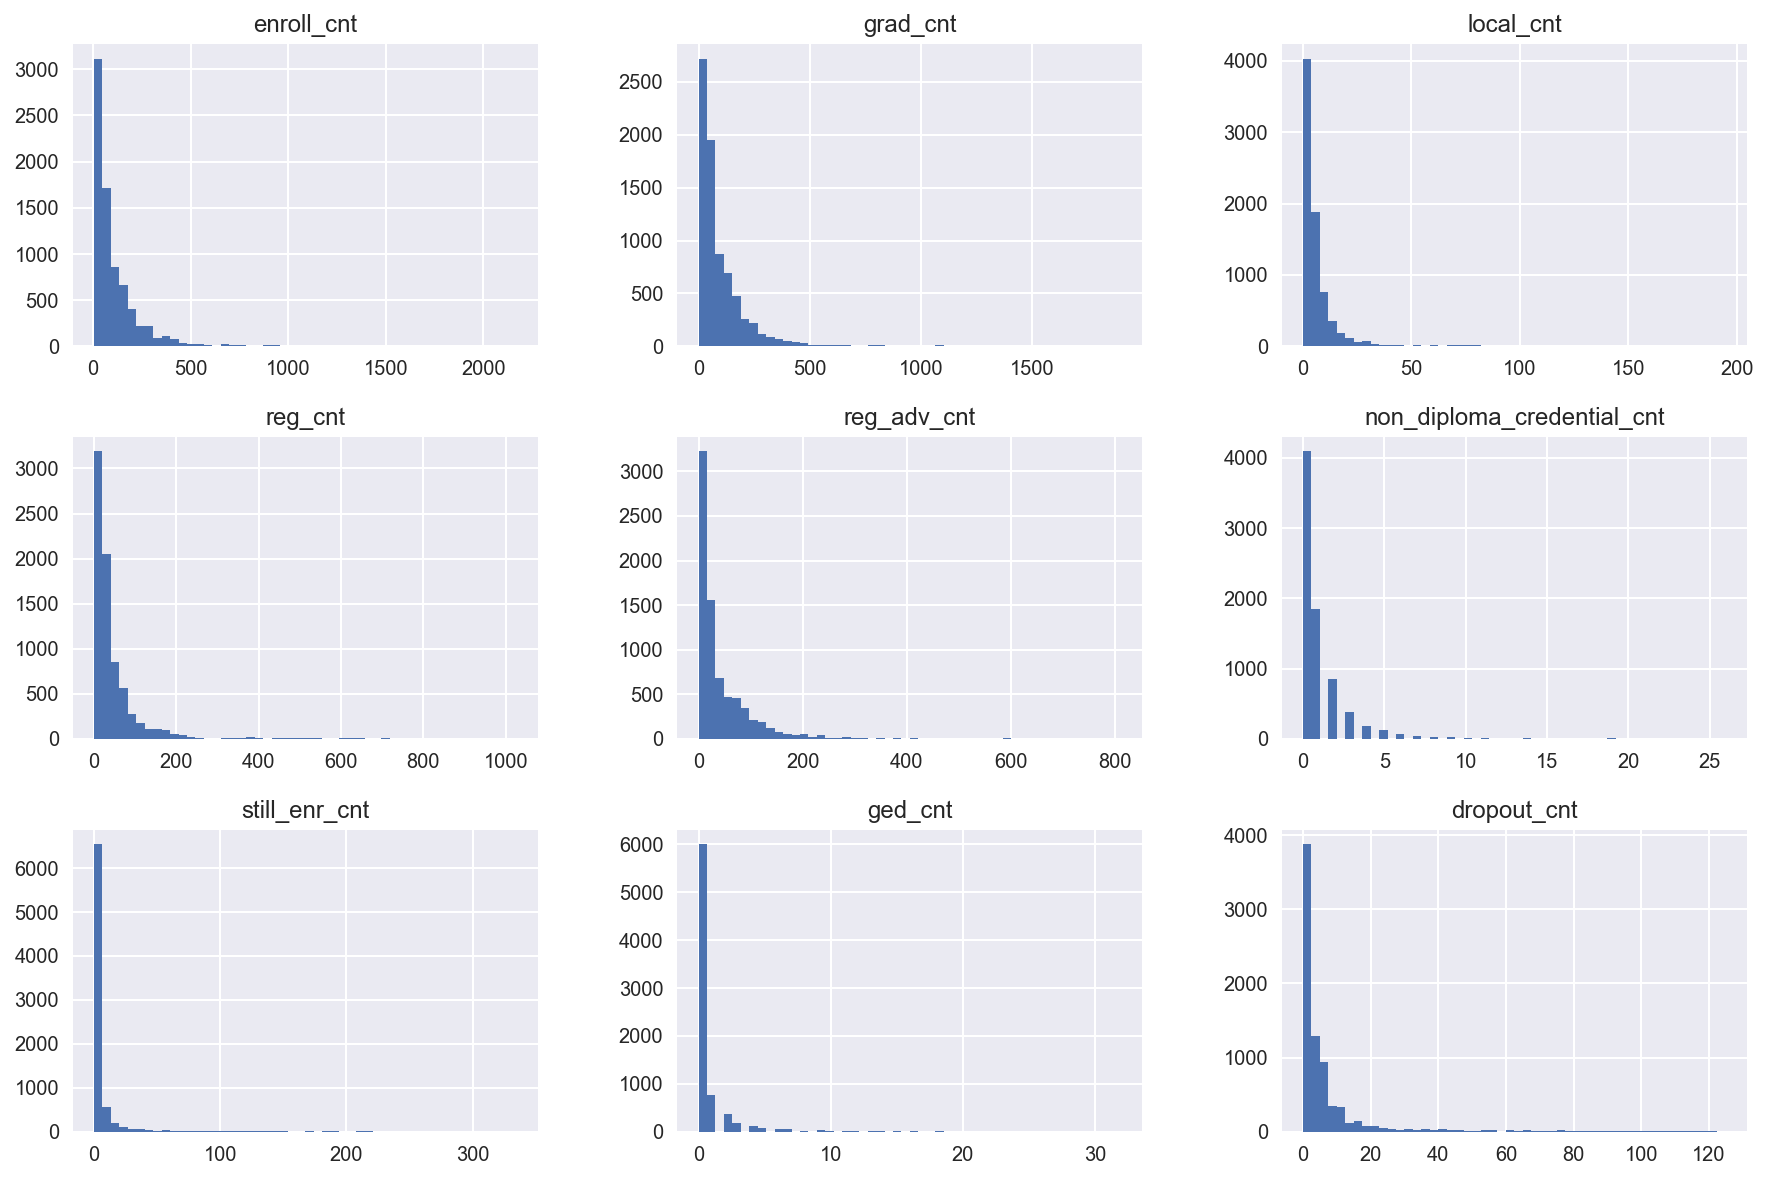

In [48]:
# draw the histogram for count variables
prepared_student_df[cnt_cols].hist(bins=50, figsize=(15,10))
plt.show()

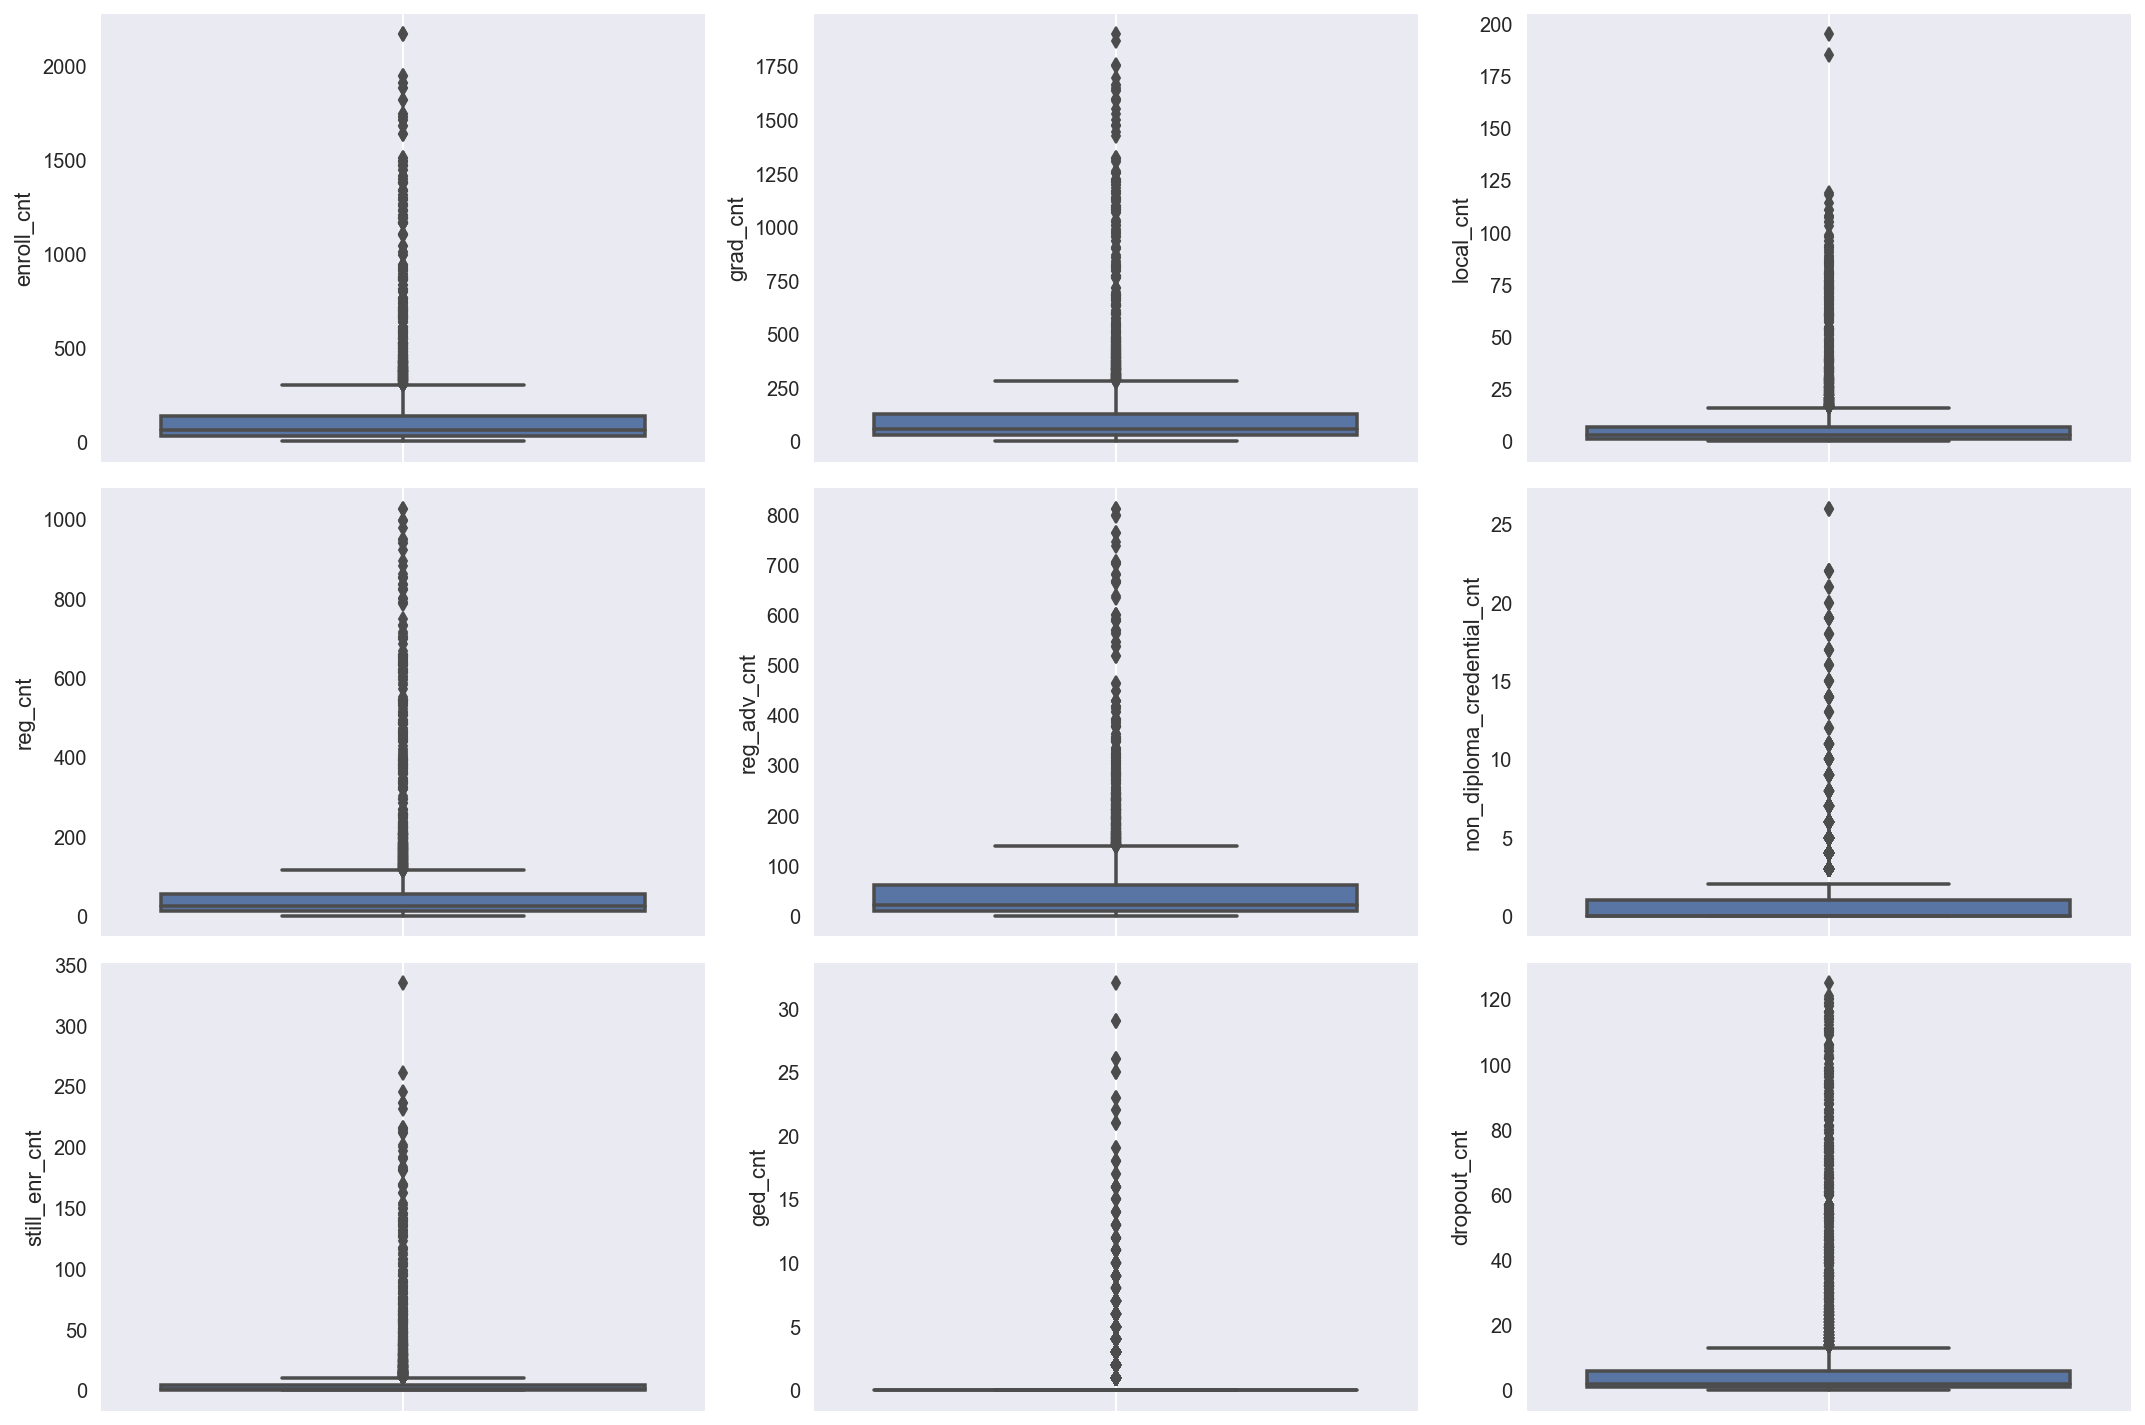

In [49]:
# Draw the box plots for count variables
plt.figure(figsize = (15, 10))
for i, col in enumerate(cnt_cols):
    plt.subplot(3,3, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=prepared_student_df,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

#### Using histogram and box plot to view the percentage variables

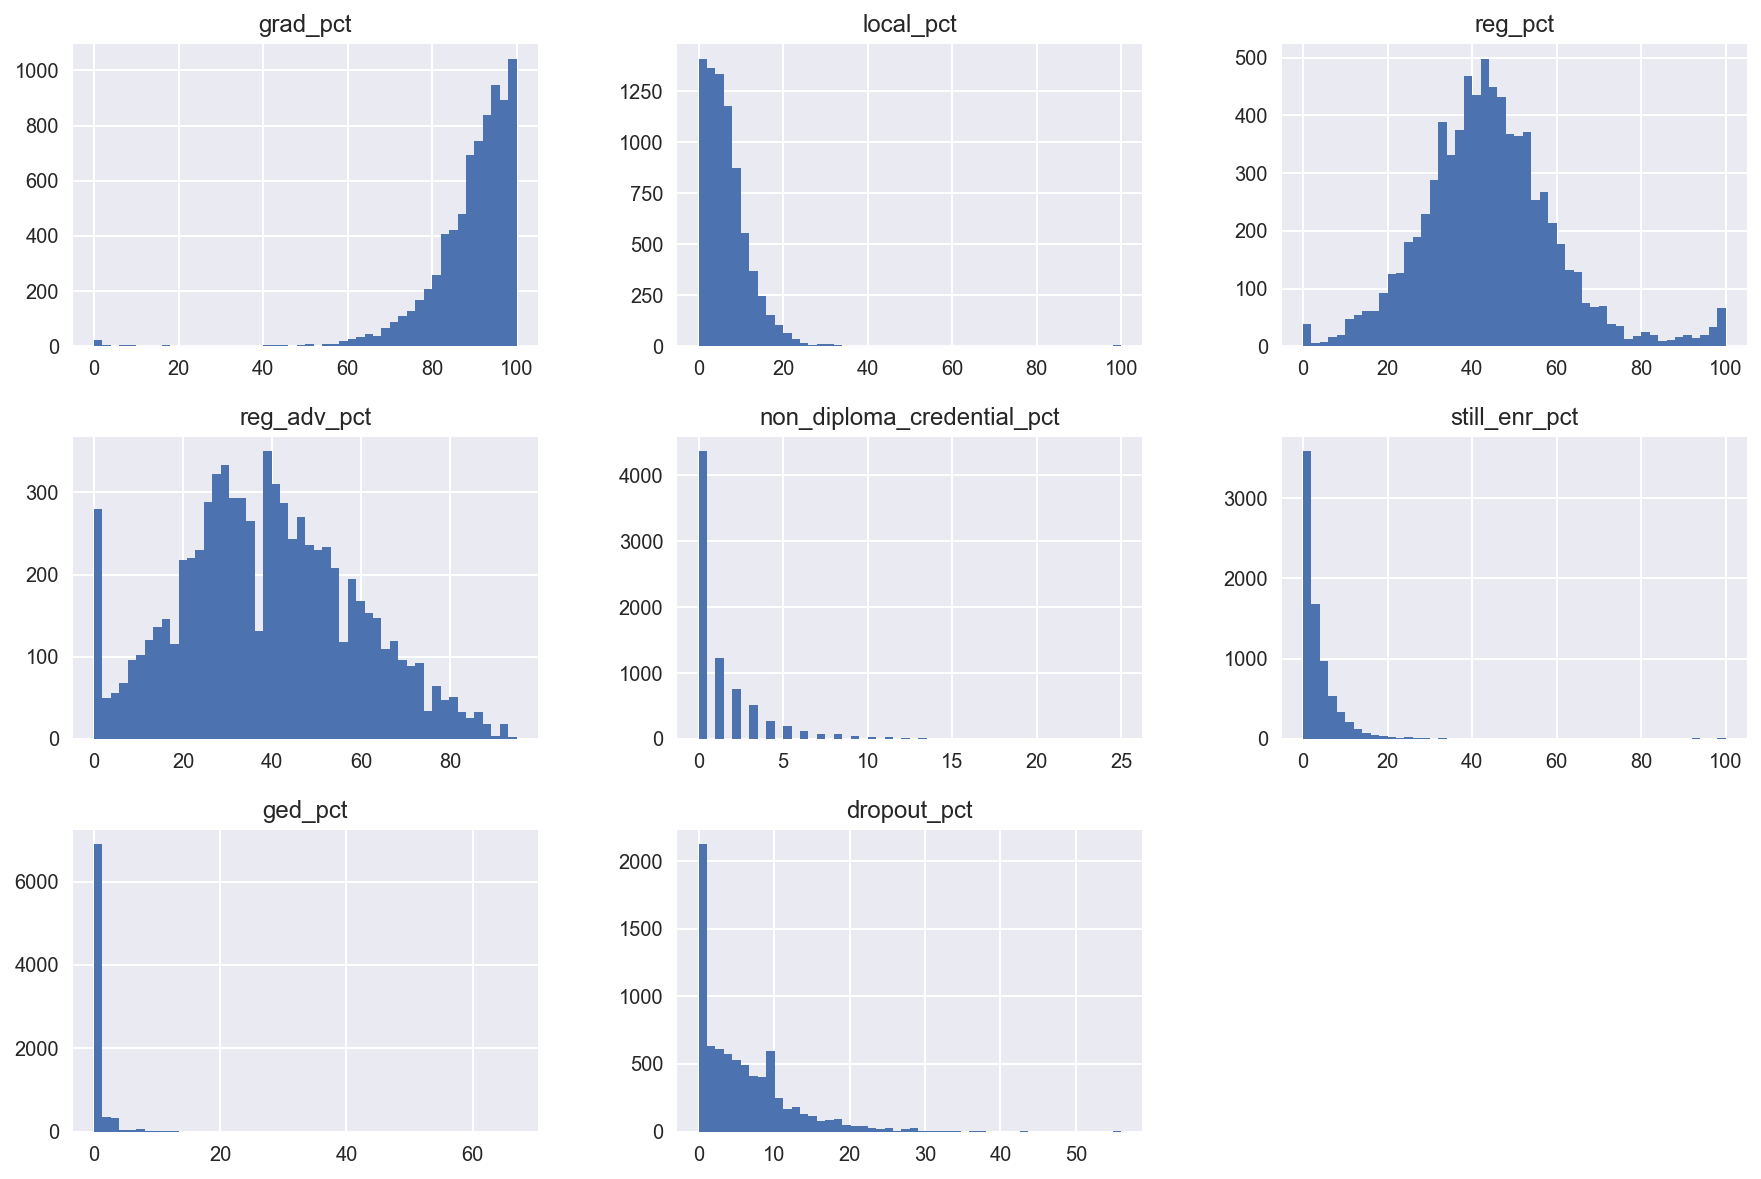

In [50]:
# draw the histogram for percentage variables
prepared_student_df[pct_cols].hist(bins=50, figsize=(15,10))
plt.show()

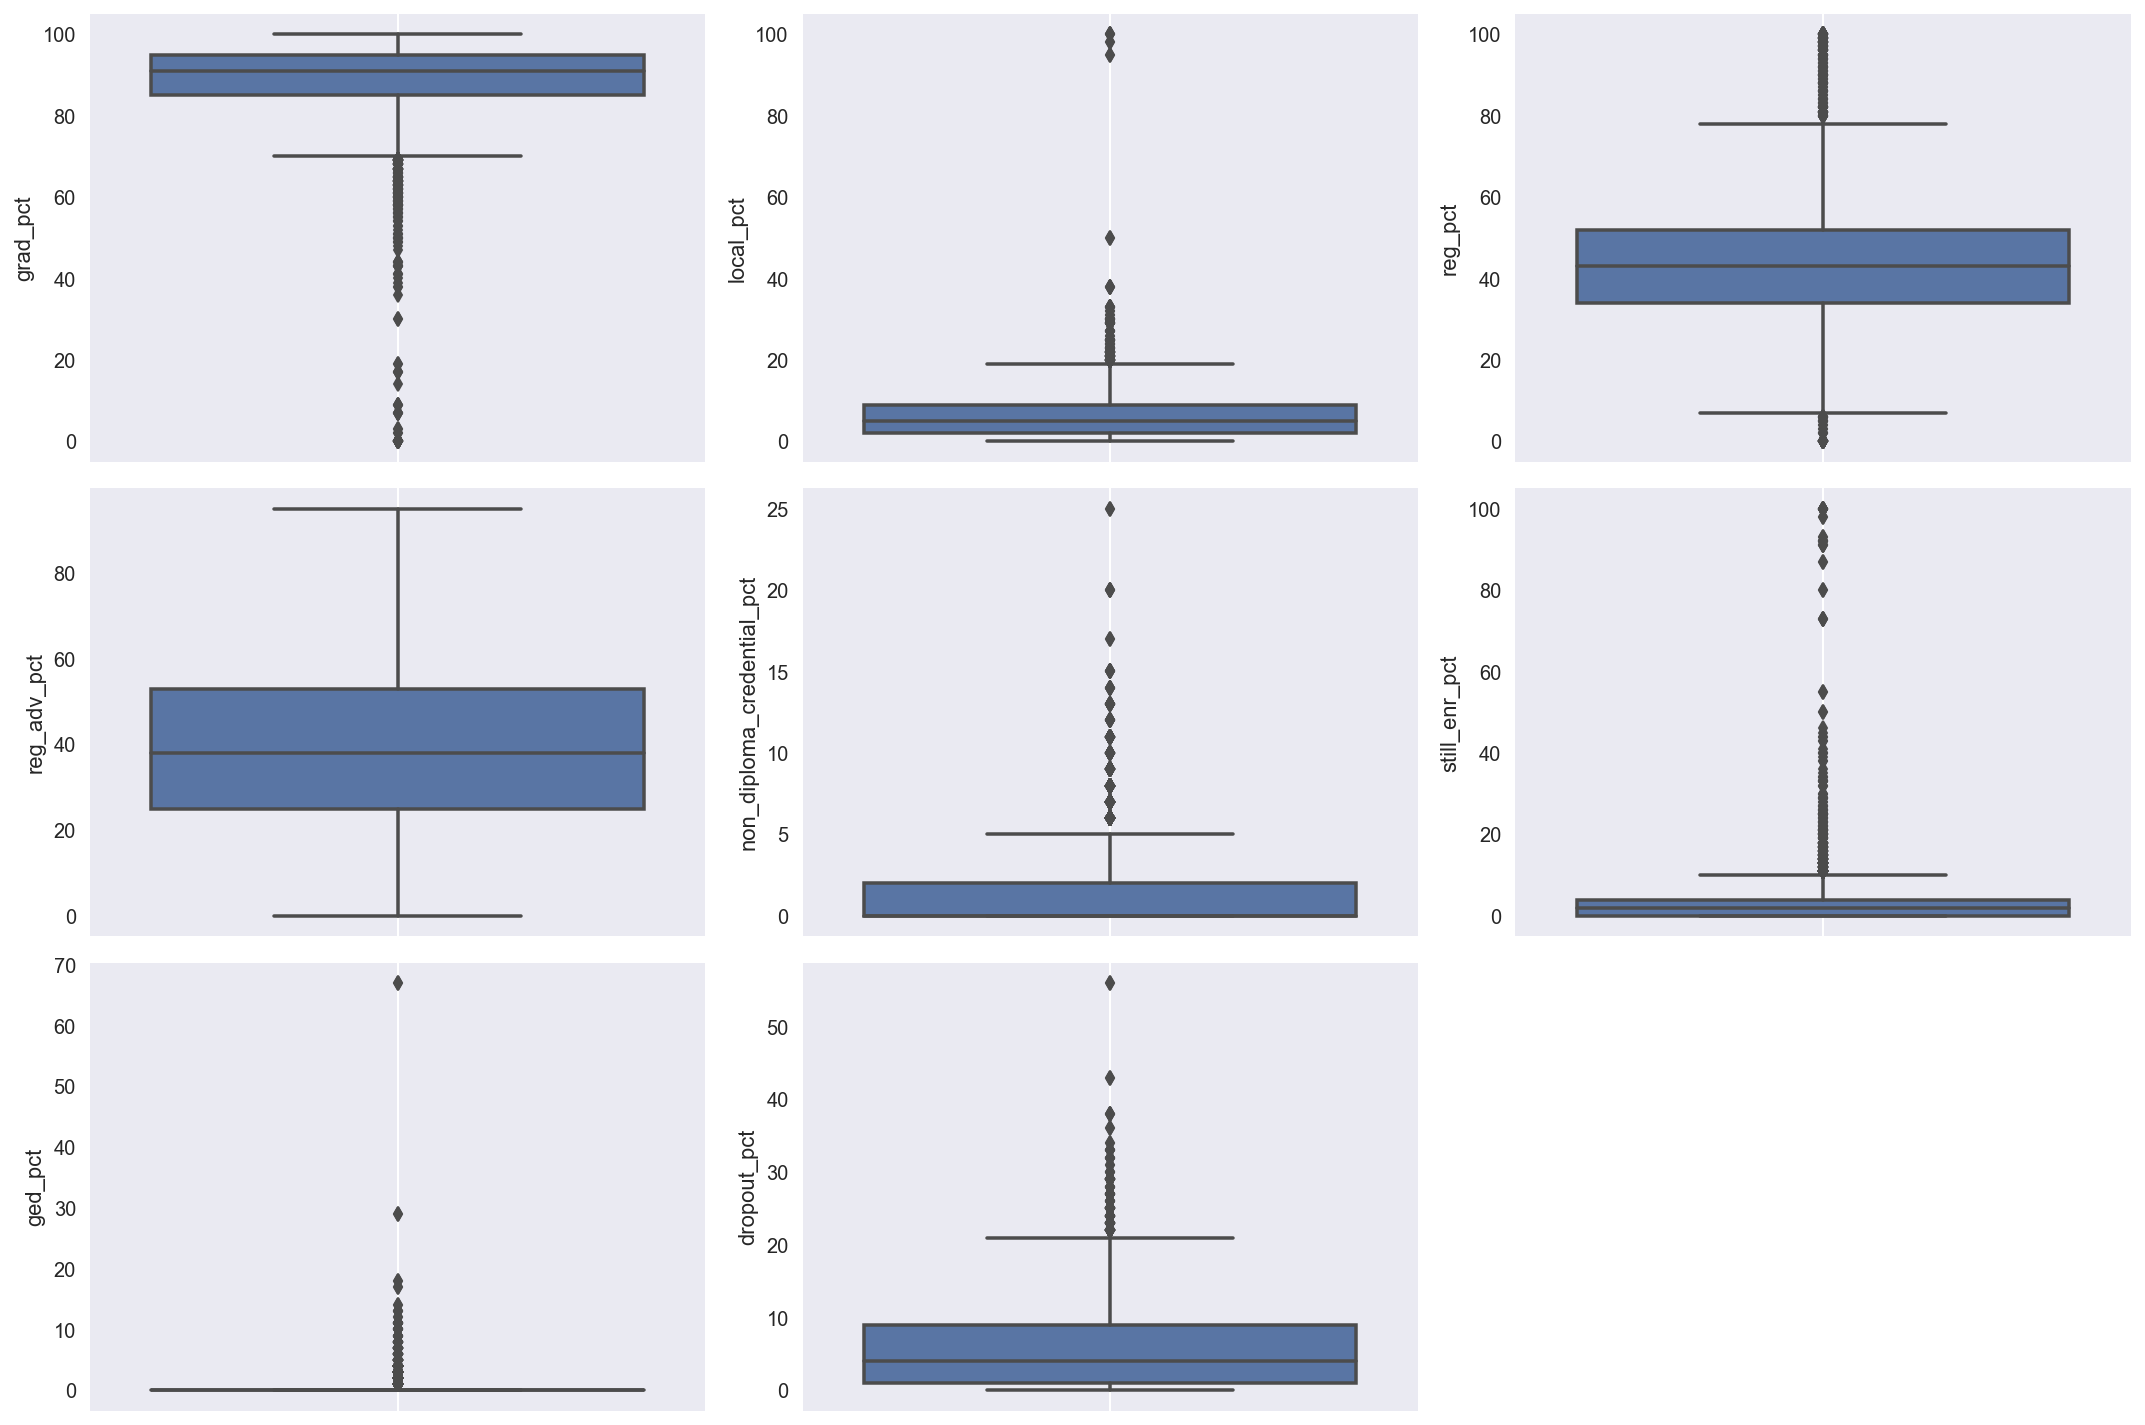

In [51]:
# Draw the box plots for count variables
plt.figure(figsize = (15, 10))
for i, col in enumerate(pct_cols):
    plt.subplot(3,3, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=prepared_student_df,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

In [52]:
corr_matrix_3_sigema = prepared_student_df[cnt_cols + pct_cols].corr()
corr_matrix_3_sigema["dropout_cnt"].sort_values(ascending = False)

dropout_cnt                   1.000000
local_cnt                     0.822759
reg_cnt                       0.788017
enroll_cnt                    0.759615
grad_cnt                      0.692301
still_enr_cnt                 0.664864
non_diploma_credential_cnt    0.664470
ged_cnt                       0.650834
dropout_pct                   0.425349
reg_adv_cnt                   0.368847
still_enr_pct                 0.163901
local_pct                     0.080636
reg_pct                       0.077338
ged_pct                       0.076039
non_diploma_credential_pct    0.000695
reg_adv_pct                  -0.284401
grad_pct                     -0.356056
Name: dropout_cnt, dtype: float64

The above charts and statistic description shows as followed:
Although the correlation values between response (dropout_cnt) and other variables have decreased, other variables become more concentrate and have less outliers.

# 6. Feature selecting

- Split data set
- normalization & standardization

- select features for Poisson Regression

- select features for negative binomial regression models

- select features for multiple linear regression

### Split data set & normalization & standardization

Usually, I use StandardScaler to convert data from different scales to the same scales. Variables with same scales can get a good accurate when training a model.

If variables of data have many outliers, RobustScaler can solve outliers better than StandardScaler.

In [53]:
def get_train_test_X_y(data_df, y_col, size=0.3, std_cols=None):
    y = data_df[y_col]
    X = data_df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    cols = X.columns
    
    if std_cols:
        # std = preprocessing.StandardScaler()
        
        # RobustScaler can solve outliers better than StandardScaler
        std = preprocessing.RobustScaler()
        
        fitted = std.fit_transform(X_train[std_cols])
        
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        
        test_fit = std.transform(X_test[std_cols])
        
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

In [54]:
# response column
response_col = ['dropout_cnt']

# all count columns
cnt_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 
       'still_enr_cnt', 'ged_cnt',  'dropout_cnt']

# all percentage columns
pct_cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
       'still_enr_pct', 'ged_pct']

In [55]:
# Create train and test set
X_train, X_test, y_train, y_test = get_train_test_X_y(prepared_student_df, "dropout_cnt", std_cols=None)

# check X_train
X_train.shape

(5427, 20)

Dummy the X_train

In [56]:
X_train_dummy = pd.get_dummies(X_train)

In [57]:
X_train_dummy.head(3)

,nyc_ind,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct,nrc_desc_Average Needs,nrc_desc_Buffalo Rochester Yonkers Syracuse,nrc_desc_Low Needs,nrc_desc_NYC,nrc_desc_Rural High Needs,nrc_desc_Urban-Suburban High Needs,membership_desc_2013 Total Cohort - 6 Year Outcome,membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019,membership_desc_2014 Total Cohort - 5 Year Outcome,membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019,membership_desc_2015 Total Cohort - 4 Year Outcome,membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019,subgroup_name_Female,subgroup_name_Male
50469,0,20,18,1,13,4,0,2,0,90.0,5.0,65.0,20.0,0.0,10.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
32061,0,243,235,13,96,126,0,1,0,97.0,5.0,40.0,52.0,0.0,0.0,0.0,3.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
25544,0,246,228,1,68,159,2,15,0,93.0,0.0,28.0,65.0,1.0,6.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


### select features for Poisson Regression

Using Lasso to select the best features for Poisson Regression Model 1

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
lasso_lars_cv = linear_model.LassoLarsCV( cv=10, max_n_alphas=10 ).fit(X_train_dummy, y_train)

model_lasso = SelectFromModel(lasso_lars_cv, prefit=True)
X_train_Poisson_1 = model_lasso.transform(X_train_dummy)

mask = model_lasso.get_support()
new_features_Poisson_1 = X_train_dummy.columns[mask] #Output Index(['name1', 'name2'],dtype='object')

print(new_features_Poisson_1)

print(X_train_Poisson_1.shape)

Index(['nyc_ind', 'enroll_cnt', 'local_cnt', 'reg_cnt',
       'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_pct',
       'nrc_desc_Urban-Suburban High Needs'],
      dtype='object')
(5427, 9)


D:\dev\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.809e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
D:\dev\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 27 iterations, alpha=1.555e-02, previous alpha=1.208e-02, with an active set of 12 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
D:\dev\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=4.096e-02, with an active set of 7 regressors, a

In [59]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = SelectFromModel(RandomForestRegressor()).fit(X_train_dummy, y_train)

mask = model_rfr.get_support()
new_features_Poisson_2 = X_train_dummy.columns[mask]

print(new_features_Poisson_2)

print(new_features_Poisson_2.shape)

Index(['nyc_ind', 'enroll_cnt', 'local_cnt', 'reg_cnt', 'dropout_pct'], dtype='object')
(5,)


### select features for negative binomial regression models

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=10)
X_train_negative_binomial_1 = selector.fit_transform(X_train_dummy, y_train)  #Applying transformation to the training set

#to get names of the selected features
mask = selector.get_support()     # Output   array([False, False,  True,  True,  True, False ....])

#print(selector.scores_)     #Output array([0.16978127, 0.01829886, 0.45461366, 0.55126343, 0.66081217, 0.27715287 ....])

new_features_negative_binomial_1 = X_train_dummy.columns[mask]

print(new_features_negative_binomial_1)
print(X_train_negative_binomial_1.shape)

Index(['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt',
       'still_enr_cnt', 'grad_pct', 'reg_pct', 'reg_adv_pct', 'dropout_pct'],
      dtype='object')
(5427, 10)


In [61]:
selector = SelectKBest(mutual_info_regression, k=5)
X_train_negative_binomial_2 = selector.fit_transform(X_train_dummy, y_train)  #Applying transformation to the training set

#to get names of the selected features
mask = selector.get_support()     # Output   array([False, False,  True,  True,  True, False ....])

#print(selector.scores_)     #Output array([0.16978127, 0.01829886, 0.45461366, 0.55126343, 0.66081217, 0.27715287 ....])

new_features_negative_binomial_2 = X_train_dummy.columns[mask]

print(new_features_negative_binomial_2)
print(X_train_negative_binomial_2.shape)

Index(['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'dropout_pct'], dtype='object')
(5427, 5)


### select features for multiple linear regression

In [62]:
# select correlation values large than 0.6
corr_matrix_mult_linear = prepared_student_df[cnt_cols + pct_cols].corr()
new_features_mult_1 = corr_matrix_mult_linear.loc[corr_matrix_3_sigema['dropout_cnt'] > 0.6]["dropout_cnt"].sort_values(ascending = False).index

# remove 'dropout_cnt' 
new_features_mult_1 = new_features_mult_1.values[1:]
new_features_mult_1

array(['local_cnt', 'reg_cnt', 'enroll_cnt', 'grad_cnt', 'still_enr_cnt',
       'non_diploma_credential_cnt', 'ged_cnt'], dtype=object)

In [63]:
new_features_mult_2 = corr_matrix_mult_linear.loc[corr_matrix_3_sigema['dropout_cnt'] > 0.75]["dropout_cnt"].sort_values(ascending = False).index

# remove 'dropout_cnt' 
new_features_mult_2 = new_features_mult_2.values[1:]
new_features_mult_2

array(['local_cnt', 'reg_cnt', 'enroll_cnt'], dtype=object)

# 7. Regression Modeling
  - 2 Poisson regression models
  - 2 negative binomial regression models
  - 2 multiple linear regression models

### Poisson regression models

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import r2_score

def evaluate_printing(re = {}):
    """
    input: return_result = {"model name":"Poisson Regression 1",
         "RMSE_arr" = RMSE_arr,
         "MAE_arr" = MAE_arr,
         "MPD_arr" = MPD_arr,
         "r2_arr" = r2_arr}
         
         
    RMSE_arr =[] : Root mean squared error. If you want to penalize large errors, 
    his is a good metric to use. If you assume that errors are normally distributed, this is a good choice.

    MAE_arr =[] : Mean absolute error If you want to ignore outliers, this is a good metric to use.  a lower score is better
    
    MPD_arr =[] : Mean Poisson deviance regression loss. 

    """
    
    RMSE_arr = re['RMSE_arr']
    MAE_arr = re['MAE_arr']
    MPD_arr = re['MPD_arr']
    r2_arr = re['r2_arr']
    
    print("Model Name : %s" %re['model name'])
    print("mean of RMSE: %.3f" %np.mean(RMSE_arr))
    print("mean of MAE: %.3f" %np.mean(MAE_arr))
    
    
    if len(MPD_arr) > 0 :
        print("mean of mean Poisson deviance: %.3f" %np.mean(MPD_arr))
        
    print("mean of r2: %.3f" %np.mean(r2_arr))
    

def evaluate_poisson_regression_cv(X_df, y_df, model_name, cv = 5):
    
    kfold = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    RMSE_arr =[] # Root mean squared error. If you want to penalize large errors, this is a good metric to use. If you assume that errors are normally distributed, this is a good choice.
    MAE_arr =[] # Mean absolute error If you want to ignore outliers, this is a good metric to use.  a lower score is better
    MPD_arr =[] # Mean Poisson deviance regression loss. 
    r2_arr = []
    
    return_result = {"model name": model_name}
    return_result['RMSE_arr'] = RMSE_arr
    return_result['MAE_arr'] = MAE_arr
    return_result['MPD_arr'] = MPD_arr
    return_result['r2_arr'] = r2_arr
    
    
    for train_idx, test_idx in kfold.split(X_df):

        X_train_f, X_test_f = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_f, y_test_f = y_df.iloc[train_idx], y_df.iloc[test_idx]
        
        model = sm.GLM(y_train_f.astype(float), X_train_f.astype(int), 
                                            family=sm.families.Poisson()).fit()
        
        
        predictions = model.get_prediction(X_test_f.astype(float))
        
        pred_summary_frame = predictions.summary_frame()
        predicted_counts = pred_summary_frame['mean']
        
        # print(type(y_test_f))
        # print(type(predicted_counts))
        
        #print("MSE: %.3f" %mean_squared_error(y_test_f, predicted_counts))
        RMSE_arr.append(mean_squared_error(y_test_f, predicted_counts, squared=False))
        
        #print("MAE: %.3f" %mean_absolute_error(y_test_f, predicted_counts))
        MAE_arr.append(mean_absolute_error(y_test_f, predicted_counts))
        
        #print("mean Poisson deviance: %.3f" %mean_poisson_deviance(y_test_f, predicted_counts))
        MPD_arr.append(mean_poisson_deviance(y_test_f, predicted_counts))
        
        r2_arr.append(r2_score(y_test_f, predicted_counts))
        
        #print("-----------------------------")
    
    evaluate_printing(return_result)
    return return_result

In [65]:
# create a list to store all result of models.
all_model_cv_results = []

### Poisson Model 1

features : ['nyc_ind', 'enroll_cnt', 'local_cnt', 'reg_cnt',
       'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_pct',
       'nrc_desc_Urban-Suburban High Needs']

In [66]:
new_features_Poisson_1

Index(['nyc_ind', 'enroll_cnt', 'local_cnt', 'reg_cnt',
       'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_pct',
       'nrc_desc_Urban-Suburban High Needs'],
      dtype='object')

In [67]:
X_train_Poisson_1_df = X_train_dummy[new_features_Poisson_1]

pm1 = evaluate_poisson_regression_cv(X_train_Poisson_1_df, y_train, "Poission Model 1")
all_model_cv_results.append(pm1)

Model Name : Poission Model 1
mean of RMSE: 15.674
mean of MAE: 4.174
mean of mean Poisson deviance: 4.544
mean of r2: -0.051


### Poisson Model 2

features : ['nyc_ind', 'non_diploma_credential_cnt', 'ged_cnt', 'dropout_pct',
       'nrc_desc_Urban-Suburban High Needs']

In [68]:
new_features_Poisson_2

Index(['nyc_ind', 'enroll_cnt', 'local_cnt', 'reg_cnt', 'dropout_pct'], dtype='object')

In [69]:
X_train_Poisson_2_df = X_train_dummy[new_features_Poisson_2]

pm2 = evaluate_poisson_regression_cv(X_train_Poisson_2_df, y_train, "Poission Model 2")
all_model_cv_results.append(pm2)

Model Name : Poission Model 2
mean of RMSE: 28.251
mean of MAE: 5.025
mean of mean Poisson deviance: 6.144
mean of r2: -3.721


Poission Model 1 has lower mean of RMSE than Poission Model 2

### negative binomial regression models

In [70]:
def evaluate_negative_regression_cv(X_df, y_df, model_name, cv = 5):
    
    kfold = KFold(n_splits=cv, shuffle=True, random_state=1)
    RMSE_arr =[]
    MAE_arr =[]
    MPD_arr =[] # mean Poisson deviance
    r2_arr = []
    
    return_result = {"model name": model_name}
    return_result['RMSE_arr'] = RMSE_arr
    return_result['MAE_arr'] = MAE_arr
    return_result['MPD_arr'] = MPD_arr
    return_result['r2_arr'] = r2_arr
    
    for train_idx, test_idx in kfold.split(X_df):

        X_train_f, X_test_f = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_f, y_test_f = y_df.iloc[train_idx], y_df.iloc[test_idx]
        
        
        Poisson_negative_binomial_2_df = pd.concat([X_train_f, y_train_f], axis = 1)
        
        Poisson_negative_binomial_2_training_results = sm.GLM(y_train_f.astype(int), 
                                                      X_train_f.astype(float), 
                                                      family=sm.families.Poisson()).fit()
        
        Poisson_negative_binomial_2_df['BB_LAMBDA'] = Poisson_negative_binomial_2_training_results.mu

        Poisson_negative_binomial_2_df['AUX_OLS_DEP'] = Poisson_negative_binomial_2_df.apply(
            lambda x: ((x['dropout_cnt'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)
        
        # Let’s use patsy to form the model specification for the OLSR. 
        ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

        # fit the OLSR model:
        aux_olsr_results = smf.ols(ols_expr, Poisson_negative_binomial_2_df).fit()
        
        negative_binomial_model = sm.GLM(y_train_f.astype(float), X_train_f.astype(float), 
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
        
        
        predictions = negative_binomial_model.get_prediction(X_test_f.astype(float))
        
        pred_summary_frame = predictions.summary_frame()
        predicted_counts = pred_summary_frame['mean']
        
        # print(type(y_test_f))
        # print(type(predicted_counts))
        
        #print("MSE: %.3f" %mean_squared_error(y_test_f, predicted_counts))
        RMSE_arr.append(mean_squared_error(y_test_f, predicted_counts, squared=False))
        
        #print("MAE: %.3f" %mean_absolute_error(y_test_f, predicted_counts))
        MAE_arr.append(mean_absolute_error(y_test_f, predicted_counts))
        
        #print("mean Poisson deviance: %.3f" %mean_poisson_deviance(y_test_f, predicted_counts))
        MPD_arr.append(mean_poisson_deviance(y_test_f, predicted_counts))
        
        r2_arr.append(r2_score(y_test_f, predicted_counts))
        
    # evaluate
    evaluate_printing(return_result)
    return return_result

### negative binomial regression model 1

In [71]:
# show features
new_features_negative_binomial_1

Index(['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt',
       'still_enr_cnt', 'grad_pct', 'reg_pct', 'reg_adv_pct', 'dropout_pct'],
      dtype='object')

In [72]:
X_train_Poisson_negative_binomial_1_df = X_train_dummy[new_features_negative_binomial_1]

nr1 = evaluate_negative_regression_cv(X_train_Poisson_negative_binomial_1_df, y_train, "negative binomial regression model 1")

all_model_cv_results.append(nr1)

Model Name : negative binomial regression model 1
mean of RMSE: 322.568
mean of MAE: 19.045
mean of mean Poisson deviance: 29.204
mean of r2: -572.449


### negative binomial regression model 2

In [73]:
# show features
new_features_negative_binomial_2

Index(['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'dropout_pct'], dtype='object')

In [74]:
X_train_Poisson_negative_binomial_2_df = X_train_dummy[new_features_negative_binomial_2]

nr2 = evaluate_negative_regression_cv(X_train_Poisson_negative_binomial_2_df, y_train, "negative binomial regression model 2")

all_model_cv_results.append(nr2)

Model Name : negative binomial regression model 2
mean of RMSE: 625.238
mean of MAE: 30.255
mean of mean Poisson deviance: 51.383
mean of r2: -2358.853


negative binomial regression model 1 has lower mean of RMSE than negative binomial regression model 2.

### multiple linear regression models

In [75]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

def evaluate_mult_regression_cv(X_df, y_df, model_name, cv = 5):
    
    kfold = KFold(n_splits=cv, shuffle=True, random_state=1)
    RMSE_arr = []
    MAE_arr = []
    MPD_arr = [] # mean Poisson deviance
    r2_arr = []
    
    return_result = {"model name": model_name}
    return_result['RMSE_arr'] = RMSE_arr
    return_result['MAE_arr'] = MAE_arr
    return_result['MPD_arr'] = MPD_arr
    return_result['r2_arr'] = r2_arr
    
    for train_idx, test_idx in kfold.split(X_df):

        X_train_f, X_test_f = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_f, y_test_f = y_df.iloc[train_idx], y_df.iloc[test_idx]
        
        polynomial_features = PolynomialFeatures(degree=2)
        X_train_mult_poly = polynomial_features.fit_transform(X_train_f)
        
        mult_model_1 = LinearRegression()
        mult_model_1.fit(X_train_mult_poly, y_train_f)
        
        X_test_poly = polynomial_features.fit_transform(X_test_f)

        y_test_pred = mult_model_1.predict(X_test_poly)
        
        # print(type(y_test_f))
        # print(type(predicted_counts))
        
        #print("MSE: %.3f" %mean_squared_error(y_test_f, predicted_counts))
        RMSE_arr.append(mean_squared_error(y_test_f, y_test_pred, squared=False))
        
        #print("MAE: %.3f" %mean_absolute_error(y_test_f, predicted_counts))
        MAE_arr.append(mean_absolute_error(y_test_f, y_test_pred))
        
        r2_arr.append(r2_score(y_test_f, y_test_pred))
        
        # Ignore non-positive predictions, as they are invalid for
        # the Poisson deviance.
        mask = y_test_pred > 0
        if (~mask).any():
            n_masked, n_samples = (~mask).sum(), mask.shape[0]
            
            #print(f"WARNING: Estimator yields invalid, non-positive predictions "
            #  f" for {n_masked} samples out of {n_samples}. These predictions "
            #  f"are ignored when computing the Poisson deviance.")
        
        #print("mean Poisson deviance: %.3f" %mean_poisson_deviance(y_test_f, predicted_counts))
        #MPD_arr.append(mean_poisson_deviance(y_test_f[mask], y_test_pred[mask]))
        
    #print("-----------------------------")
    evaluate_printing(return_result)
    return return_result

### multiple linear regression model 1

In [76]:
# show the features
new_features_mult_1

array(['local_cnt', 'reg_cnt', 'enroll_cnt', 'grad_cnt', 'still_enr_cnt',
       'non_diploma_credential_cnt', 'ged_cnt'], dtype=object)

In [77]:
X_train_mult_1_df = X_train_dummy[new_features_mult_1]

mr1 = evaluate_mult_regression_cv(X_train_mult_1_df, y_train, "multiple linear regression model 1")

all_model_cv_results.append(mr1)

Model Name : multiple linear regression model 1
mean of RMSE: 0.353
mean of MAE: 0.133
mean of r2: 1.000


### multiple linear regression model 2

In [78]:
# show the features
new_features_mult_2

array(['local_cnt', 'reg_cnt', 'enroll_cnt'], dtype=object)

In [79]:
X_train_mult_2_df = X_train_dummy[new_features_mult_2]

mr2 = evaluate_mult_regression_cv(X_train_mult_2_df, y_train, "multiple linear regression model 2")

all_model_cv_results.append(mr2)

Model Name : multiple linear regression model 2
mean of RMSE: 8.359
mean of MAE: 4.451
mean of r2: 0.733


multiple linear regression model 1 has lower mean of RMSE than multiple linear regression model 2

### Summary

Poission Model 1 has lower mean of RMSE than Poission Model 2.

negative binomial regression model 1 has lower mean of RMSE than negative binomial regression model 2.

multiple linear regression model 1 has lower mean of RMSE than multiple linear regression model 2.

# Select Models

Let's see metrics of all models

In [80]:
# Print all cross validation results.
for m in all_model_cv_results:
    evaluate_printing(m)
    print("-------------------")        

Model Name : Poission Model 1
mean of RMSE: 15.674
mean of MAE: 4.174
mean of mean Poisson deviance: 4.544
mean of r2: -0.051
-------------------
Model Name : Poission Model 2
mean of RMSE: 28.251
mean of MAE: 5.025
mean of mean Poisson deviance: 6.144
mean of r2: -3.721
-------------------
Model Name : negative binomial regression model 1
mean of RMSE: 322.568
mean of MAE: 19.045
mean of mean Poisson deviance: 29.204
mean of r2: -572.449
-------------------
Model Name : negative binomial regression model 2
mean of RMSE: 625.238
mean of MAE: 30.255
mean of mean Poisson deviance: 51.383
mean of r2: -2358.853
-------------------
Model Name : multiple linear regression model 1
mean of RMSE: 0.353
mean of MAE: 0.133
mean of r2: 1.000
-------------------
Model Name : multiple linear regression model 2
mean of RMSE: 8.359
mean of MAE: 4.451
mean of r2: 0.733
-------------------


### Next, I select Multiple linear regression Model 1 to continue my research because it has the lowest RMSE and the highest R^2.

In [81]:
# see the features
new_features_mult_1

array(['local_cnt', 'reg_cnt', 'enroll_cnt', 'grad_cnt', 'still_enr_cnt',
       'non_diploma_credential_cnt', 'ged_cnt'], dtype=object)

In [82]:
# dummy the X_train
X_train_dummy_new = pd.get_dummies(X_train)

# get the data by selected features
X_train_dummy_select = X_train_dummy_new[new_features_mult_1]
X_train_dummy_select.shape

(5427, 7)

In [83]:
# check data
X_train_dummy_select.head(3)

,local_cnt,reg_cnt,enroll_cnt,grad_cnt,still_enr_cnt,non_diploma_credential_cnt,ged_cnt
50469,1,13,20,18,2,0,0
32061,13,96,243,235,1,0,0
25544,1,68,246,228,15,2,0


Train the model

In [84]:
# transfer to multiply variables
polynomial_features = PolynomialFeatures(degree=2)
X_train_mult_poly = polynomial_features.fit_transform(X_train_dummy_select)

# create a linear regression
selected_model = LinearRegression()
selected_model.fit(X_train_mult_poly, y_train)

LinearRegression()

In [85]:
# Let’s make some predictions on the test data set.
X_test_dummy =  pd.get_dummies(X_test)

X_test_poly = polynomial_features.fit_transform(X_test_dummy[new_features_mult_1])

# get the redictions of test set.
selected_predictions = selected_model.predict(X_test_poly)

### Evaluate the model for preditions of test set

In [86]:
# RMSE
print("RMSE = %.4f " %mean_squared_error(y_test, selected_predictions, squared=False) )

# MAE
print("MAE = %.4f " %mean_absolute_error(y_test, selected_predictions) )

# r2 of test set
print("R^2 = %.4f " %r2_score(y_test, selected_predictions))

RMSE = 0.3511 
MAE = 0.1427 
R^2 = 0.9994 


The RMSE is 0.1232. It means the model can predict dropout_cut with a very small error.

Using Residuals Plot to see whether it shows a pattern or not.

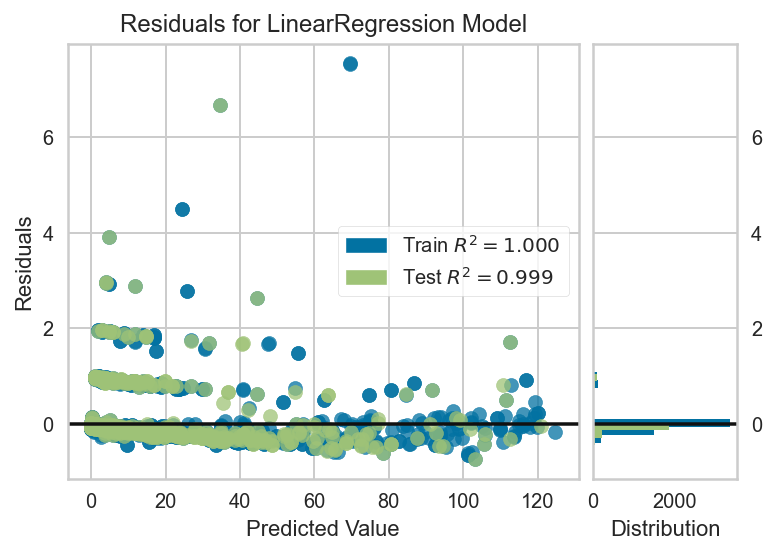

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [87]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(6, 4))
rpv = ResidualsPlot(LinearRegression())
rpv.fit(X_train_mult_poly, y_train)
rpv.score(X_test_poly, y_test)
rpv.poof()

We can not see any pattern, like a curve or a sin model, from the above Residuals Plot. The model is good.

Get resids of test set

In [88]:
# calculate resids
resids = y_test - selected_predictions

Plot a histogram to visualize the residuals and check for normality.

<AxesSubplot:title={'center':'Residual Histogram'}, ylabel='Frequency'>

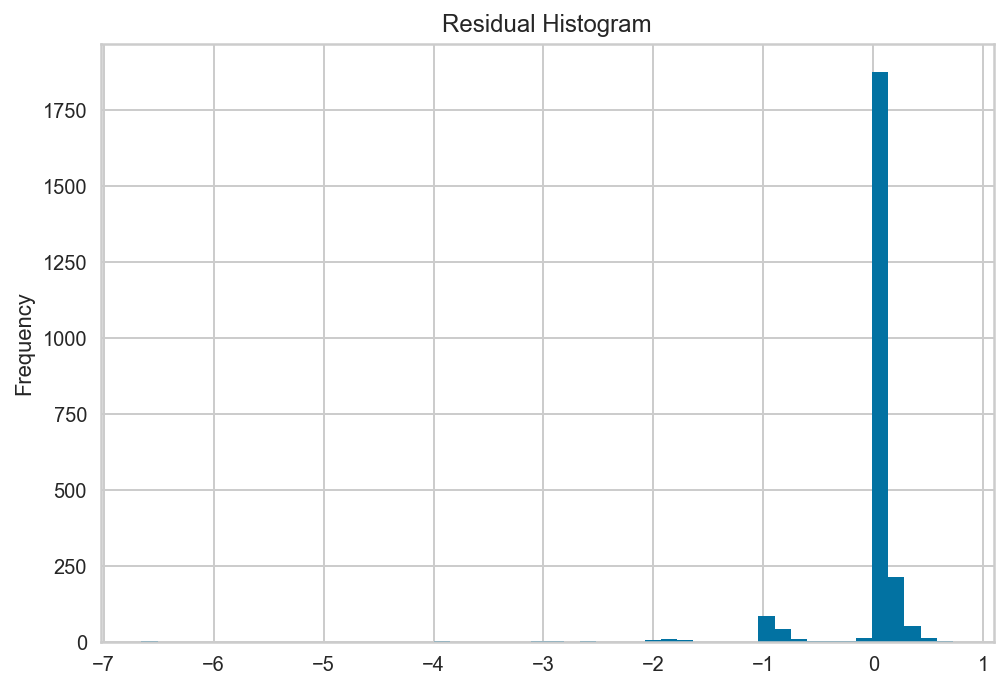

In [89]:
pd.Series(resids, name="residuals").plot.hist(
    bins=50, title="Residual Histogram"
)

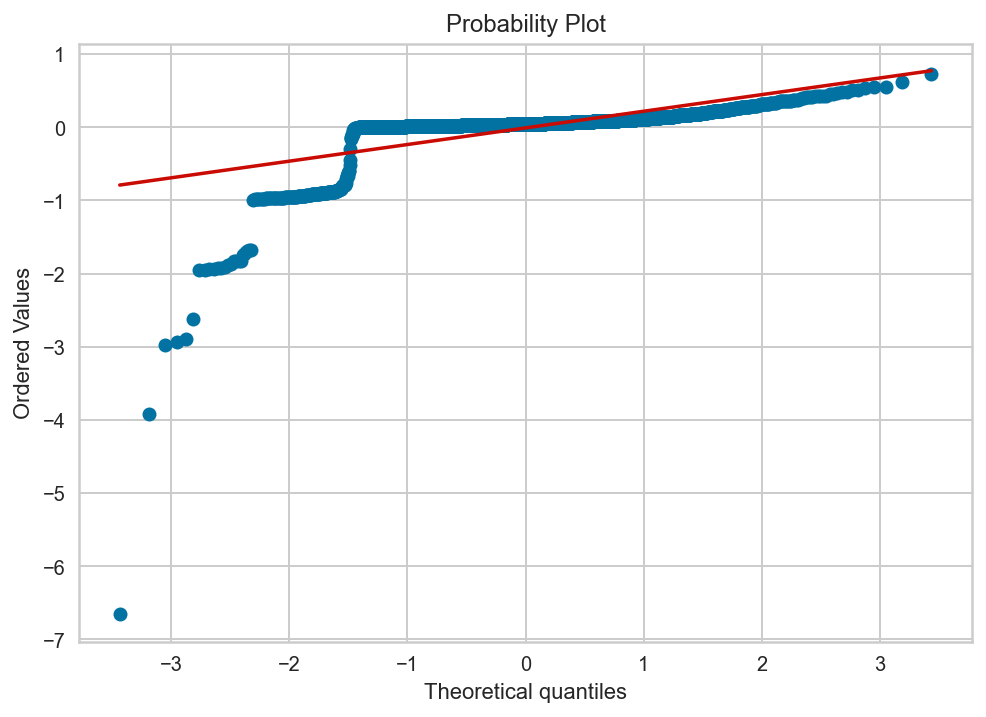

In [90]:
from scipy import stats
fig, ax = plt.subplots()
_ = stats.probplot(resids.astype(float), dist='norm', plot=ax)

From above histogram and probability plot, we can see that the resids are not normal.

The Kolmogorov-Smirnov test can evaluate whether a distribution is normal.

In [91]:
# check thee pvalue
stats.kstest(resids.astype(float), cdf = "norm")

KstestResult(statistic=0.4220751350684187, pvalue=0.0)

The pvalue is 0.0. It is less than 0.05, so the resids are not normal.

A prediction error plot shows the real targets against the predicted values. For a perfect model these points would line up in
a 45-degree line

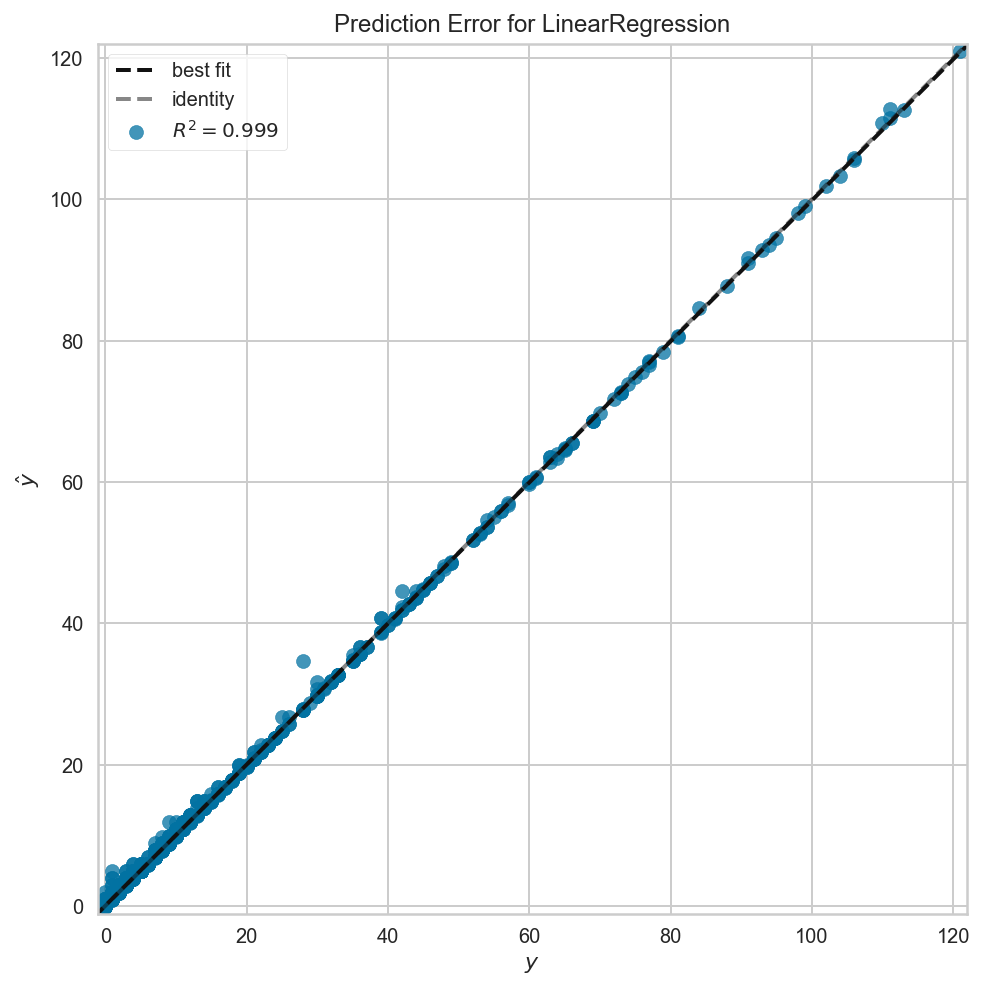

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [92]:
from yellowbrick.regressor import (
    PredictionError,
)
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(selected_model)
pev.fit(X_train_mult_poly, y_train)
pev.score(X_test_poly, y_test)
pev.poof()

The above prediction error plot shows the model is perfect.

### Using plots to view the expected values against the predict values

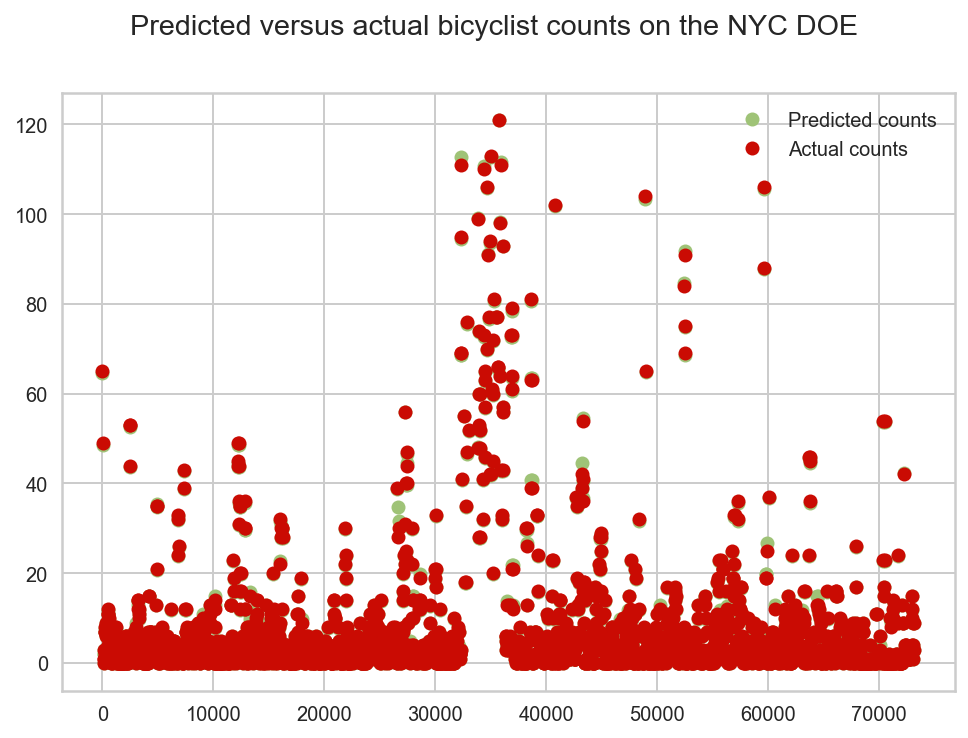

In [93]:
# Let’s plot the predicted counts versus the actual counts for the test data
y_test_df = y_test.to_frame()

#y_test_df.sort_index(inplace = True)

fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the NYC DOE')
predicted, = plt.plot(y_test_df.index, selected_predictions, 'go', label='Predicted counts')
actual, = plt.plot(y_test_df.index, y_test_df['dropout_cnt'].to_numpy(), 'ro', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

The above plot shows the predictions can present the actual value, although several predictions are larger than the actual value.

Plot Actual versus Predicted counts.

<Figure size 576x396 with 0 Axes>

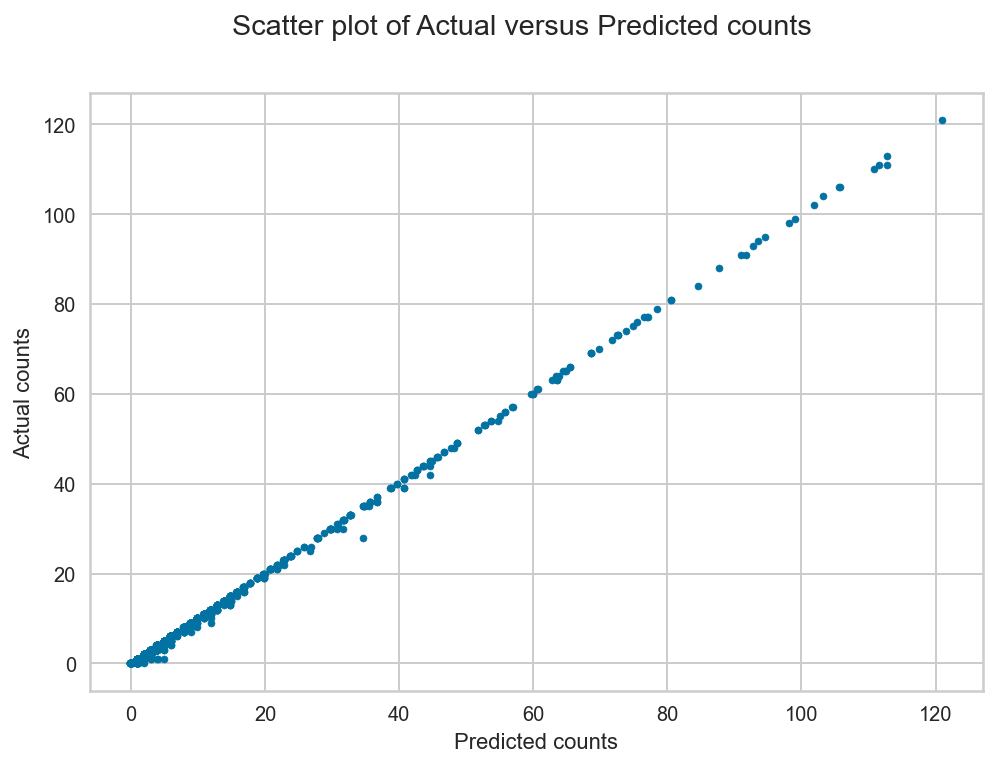

In [94]:
# Let’s also plot Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=selected_predictions, y=y_test_df['dropout_cnt'], marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

The above plot (Actual versus Predicted counts) shows a perfect 45-degree line. But when the values are below 40, the predicted values are lower than the actual values

# 9. Conclusion

- Compare 3 types of regression model

Poisson regression can predict the count with a reliable RMSE for this data set.

Negative binomial regression is not good at predicting this data set.

Multiple linear regression has the lowest RMSE and the highest R^2 when I used it to predict this data set.


- Compare the metrics

RMSE is the root Mean squared error. We can use it to compare with different models. The less the better.

MAE is the Mean absolute error. It can be used to compare with different models. The less the better. 

The differce between RMSE and MAE is that RMSE is sensitive to outliers. Hence a few large differences will increase the RMSE to a greater degree than the MAE.

R^2 can show the degree of fitting directly.

- Residual

Residual is the difference between the actual observation and the regression estimate. The less the better. The residuals showling normal distribution is good. 

If the residuals are normal distribution N(0, 1), the probability of the residuals falling outside the interval of (-2, 2) is ≤0.05. If a residual falls outside the interval of (-2, 2), it can be judged as a outiler with 95% confidence.

# 10. Reference

https://en.wikipedia.org/wiki/Root-mean-square_deviation

https://en.wikipedia.org/wiki/Mean_absolute_error

https://en.wikipedia.org/wiki/Coefficient_of_determination

https://en.wikipedia.org/wiki/Errors_and_residuals

https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155